In [1]:
#Author: Estelle Ocran
#Date: 02 June 2019

#import dependencies
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import copy
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K


/home/esha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Extracting CIFAR10 Data

In [2]:
#Import data set and create training/test sets
cifar10 = keras.datasets.cifar10
(train_im, train_cl), (test_im, test_cl) = cifar10.load_data()

In [3]:
#extracting a subset of the data set
XTrain = []
yTrain = []
num_images = 1000 #No. of images you want per class
for class_label in range(10):
    print ("Class Label: ",class_label)
    ctr=0
    for num,label in enumerate(train_cl):
        print(label)
        if label==class_label:
            #print (label)
            XTrain.append(train_im[num])
            yTrain.append([class_label])
            ctr = ctr+1
            if ctr==num_images:
                break
                
XTest = []
yTest = []
num_images1 = 100
for class_label in range(10):
    print ("Class Label: ",class_label)
    ctr=0
    for num,label in enumerate(test_cl):        
        if label==class_label:
            #print (label)
            XTest.append(test_im[num])
            yTest.append([class_label])
            ctr = ctr+1
            if ctr==num_images1:
                break
                
train_im = np.array(XTrain)
train_cl = np.array(yTrain)

test_im = np.array(XTest)
test_cl = np.array(yTest)

Class Label:  0
[6]
[9]
[9]
[4]
[1]
[1]
[2]
[7]
[8]
[3]
[4]
[7]
[7]
[2]
[9]
[9]
[9]
[3]
[2]
[6]
[4]
[3]
[6]
[6]
[2]
[6]
[3]
[5]
[4]
[0]
[0]
[9]
[1]
[3]
[4]
[0]
[3]
[7]
[3]
[3]
[5]
[2]
[2]
[7]
[1]
[1]
[1]
[2]
[2]
[0]
[9]
[5]
[7]
[9]
[2]
[2]
[5]
[2]
[4]
[3]
[1]
[1]
[8]
[2]
[1]
[1]
[4]
[9]
[7]
[8]
[5]
[9]
[6]
[7]
[3]
[1]
[9]
[0]
[3]
[1]
[3]
[5]
[4]
[5]
[7]
[7]
[4]
[7]
[9]
[4]
[2]
[3]
[8]
[0]
[1]
[6]
[1]
[1]
[4]
[1]
[8]
[3]
[9]
[6]
[6]
[1]
[8]
[5]
[2]
[9]
[9]
[8]
[1]
[7]
[7]
[0]
[0]
[6]
[9]
[1]
[2]
[2]
[9]
[2]
[6]
[6]
[1]
[9]
[5]
[0]
[4]
[7]
[6]
[7]
[1]
[8]
[1]
[1]
[2]
[8]
[1]
[3]
[3]
[6]
[2]
[4]
[9]
[9]
[5]
[4]
[3]
[6]
[7]
[4]
[6]
[8]
[5]
[5]
[4]
[3]
[1]
[8]
[4]
[7]
[6]
[0]
[9]
[5]
[1]
[3]
[8]
[2]
[7]
[5]
[3]
[4]
[1]
[5]
[7]
[0]
[4]
[7]
[5]
[5]
[1]
[0]
[9]
[6]
[9]
[0]
[8]
[7]
[8]
[8]
[2]
[5]
[2]
[3]
[5]
[0]
[6]
[1]
[9]
[3]
[6]
[9]
[1]
[3]
[9]
[6]
[6]
[7]
[1]
[0]
[9]
[5]
[8]
[5]
[2]
[9]
[0]
[8]
[8]
[0]
[6]
[9]
[1]
[1]
[6]
[3]
[7]
[6]
[6]
[0]
[6]
[6]
[1]
[7]
[1]
[5]
[8]
[3]
[6]
[6]
[8]
[6]


[6]
[0]
[3]
[4]
[6]
[3]
[2]
[0]
[3]
[5]
[7]
[0]
[3]
[5]
[4]
[7]
[8]
[5]
[7]
[0]
[2]
[8]
[0]
[2]
[4]
[6]
[6]
[6]
[3]
[7]
[6]
[3]
[5]
[9]
[9]
[7]
[4]
[9]
[1]
[9]
[6]
[5]
[1]
[7]
[0]
[2]
[0]
[2]
[7]
[4]
[9]
[8]
[3]
[5]
[3]
[0]
[5]
[1]
[6]
[7]
[7]
[8]
[8]
[2]
[7]
[9]
[2]
[4]
[6]
[5]
[9]
[8]
[4]
[6]
[7]
[8]
[2]
[8]
[5]
[8]
[9]
[0]
[2]
[3]
[0]
[9]
[7]
[3]
[7]
[9]
[5]
[3]
[6]
[6]
[9]
[9]
[1]
[5]
[1]
[2]
[2]
[4]
[0]
[9]
[5]
[4]
[2]
[8]
[9]
[9]
[2]
[0]
[2]
[6]
[9]
[1]
[3]
[8]
[8]
[6]
[6]
[4]
[9]
[6]
[4]
[4]
[0]
[4]
[9]
[2]
[2]
[0]
[4]
[0]
[9]
[6]
[7]
[9]
[0]
[9]
[3]
[9]
[9]
[9]
[6]
[2]
[3]
[6]
[7]
[6]
[0]
[5]
[7]
[6]
[4]
[4]
[9]
[8]
[0]
[9]
[4]
[6]
[0]
[7]
[1]
[3]
[6]
[6]
[0]
[4]
[7]
[1]
[1]
[4]
[9]
[8]
[6]
[8]
[0]
[6]
[1]
[1]
[8]
[5]
[5]
[5]
[3]
[4]
[5]
[5]
[8]
[6]
[9]
[3]
[4]
[3]
[4]
[2]
[4]
[3]
[3]
[8]
[8]
[9]
[5]
[7]
[2]
[8]
[2]
[3]
[1]
[9]
[6]
[4]
[8]
[5]
[1]
[6]
[1]
[7]
[6]
[4]
[3]
[2]
[3]
[9]
[0]
[5]
[2]
[3]
[9]
[5]
[3]
[2]
[4]
[4]
[5]
[8]
[3]
[4]
[5]
[6]
[6]
[7]
[3]
[1]
[6]
[5]
[9]
[8]


[5]
[1]
[1]
[6]
[5]
[8]
[7]
[4]
[6]
[2]
[7]
[7]
[8]
[7]
[5]
[5]
[7]
[6]
[4]
[6]
[2]
[2]
[8]
[9]
[6]
[9]
[4]
[6]
[8]
[8]
[2]
[1]
[3]
[3]
[8]
[4]
[0]
[4]
[7]
[2]
[5]
[4]
[4]
[0]
[8]
[4]
[3]
[6]
[3]
[8]
[8]
[2]
[9]
[6]
[9]
[5]
[6]
[2]
[3]
[7]
[1]
[4]
[7]
[9]
[0]
[5]
[8]
[6]
[7]
[3]
[1]
[7]
[2]
[5]
[6]
[6]
[0]
[5]
[0]
[8]
[4]
[2]
[4]
[4]
[7]
[1]
[5]
[8]
[5]
[2]
[3]
[8]
[8]
[4]
[9]
[8]
[5]
[9]
[5]
[2]
[5]
[8]
[4]
[7]
[3]
[3]
[3]
[1]
[3]
[8]
[9]
[3]
[8]
[1]
[8]
[3]
[6]
[9]
[2]
[2]
[6]
[3]
[5]
[5]
[7]
[3]
[6]
[0]
[1]
[2]
[1]
[1]
[8]
[5]
[2]
[7]
[3]
[4]
[4]
[8]
[5]
[5]
[6]
[5]
[3]
[5]
[4]
[5]
[2]
[2]
[9]
[0]
[8]
[9]
[3]
[6]
[1]
[0]
[6]
[1]
[1]
[2]
[0]
[3]
[5]
[7]
[0]
[2]
[7]
[7]
[0]
[4]
[5]
[6]
[7]
[5]
[7]
[2]
[5]
[0]
[7]
[1]
[9]
[3]
[7]
[6]
[0]
[7]
[3]
[4]
[4]
[5]
[2]
[9]
[2]
[0]
[3]
[1]
[6]
[2]
[2]
[4]
[7]
[3]
[1]
[8]
[7]
[3]
[0]
[6]
[5]
[3]
[5]
[3]
[8]
[6]
[8]
[3]
[3]
[5]
[8]
[1]
[6]
[9]
[5]
[6]
[0]
[9]
[9]
[5]
[6]
[8]
[9]
[6]
[0]
[6]
[3]
[6]
[1]
[0]
[6]
[2]
[3]
[5]
[1]
[9]
[0]
[6]
[6]
[5]


[6]
[3]
[2]
[7]
[8]
[8]
[6]
[0]
[7]
[9]
[4]
[5]
[6]
[4]
[2]
[1]
[1]
[2]
[1]
[5]
[9]
[9]
[0]
[8]
[4]
[1]
[1]
[6]
[3]
[3]
[9]
[0]
[7]
[9]
[7]
[7]
[9]
[1]
[5]
[1]
[6]
[6]
[8]
[7]
[1]
[3]
[0]
[3]
[3]
[2]
[4]
[5]
[7]
[5]
[9]
[0]
[3]
[4]
[0]
[4]
[4]
[6]
[0]
[0]
[6]
[6]
[0]
[8]
[1]
[6]
[2]
[9]
[2]
[5]
[9]
[6]
[7]
[4]
[1]
[8]
[7]
[3]
[6]
[9]
[3]
[0]
[4]
[0]
[5]
[1]
[0]
[3]
[4]
[8]
[5]
[4]
[7]
[2]
[3]
[9]
[7]
[6]
[7]
[1]
[4]
[7]
[0]
[1]
[7]
[3]
[1]
[8]
[4]
[4]
[2]
[0]
[2]
[2]
[0]
[0]
[9]
[0]
[9]
[6]
[8]
[2]
[7]
[7]
[4]
[0]
[3]
[0]
[8]
[9]
[4]
[2]
[7]
[2]
[5]
[2]
[5]
[1]
[9]
[4]
[8]
[5]
[1]
[7]
[4]
[4]
[0]
[6]
[9]
[0]
[7]
[8]
[8]
[9]
[9]
[3]
[3]
[4]
[0]
[4]
[5]
[6]
[6]
[0]
[1]
[0]
[8]
[0]
[4]
[8]
[8]
[1]
[5]
[2]
[6]
[8]
[1]
[0]
[0]
[7]
[7]
[5]
[9]
[6]
[2]
[8]
[3]
[4]
[7]
[3]
[9]
[0]
[1]
[2]
[4]
[8]
[1]
[8]
[6]
[4]
[4]
[5]
[7]
[1]
[3]
[9]
[8]
[0]
[1]
[7]
[5]
[8]
[2]
[8]
[0]
[4]
[1]
[8]
[9]
[8]
[2]
[9]
[9]
[2]
[7]
[5]
[7]
[3]
[8]
[8]
[4]
[4]
[2]
[7]
[1]
[6]
[4]
[0]
[4]
[6]
[9]
[7]
[6]
[2]
[5]
[5]


[0]
[6]
[4]
[3]
[2]
[6]
[8]
[7]
[2]
[1]
[1]
[9]
[5]
[4]
[5]
[8]
[0]
[1]
[0]
[9]
[1]
[8]
[2]
[4]
[7]
[4]
[2]
[4]
[4]
[7]
[0]
[0]
[6]
[4]
[6]
[7]
[8]
[5]
[9]
[9]
[2]
[9]
[3]
[3]
[5]
[7]
[7]
[6]
[7]
[0]
[0]
[0]
[6]
[3]
[1]
[2]
[6]
[3]
[7]
[3]
[2]
[2]
[8]
[8]
[6]
[6]
[0]
[0]
[3]
[1]
[1]
[1]
[3]
[4]
[4]
[6]
[4]
[7]
[3]
[2]
[3]
[9]
[7]
[2]
[7]
[9]
[2]
[3]
[6]
[7]
[5]
[9]
[2]
[6]
[3]
[5]
[6]
[5]
[3]
[4]
[6]
[9]
[1]
[7]
[7]
[5]
[9]
[4]
[2]
[3]
[8]
[0]
[9]
[6]
[6]
[1]
[3]
[6]
[6]
[3]
[9]
[3]
[6]
[5]
[2]
[0]
[4]
[7]
[4]
[8]
[5]
[5]
[0]
[0]
[9]
[0]
[3]
[6]
[2]
[9]
[8]
[1]
[1]
[4]
[3]
[4]
[0]
[3]
[7]
[3]
[8]
[6]
[4]
[2]
[4]
[1]
[2]
[7]
[5]
[2]
[6]
[8]
[0]
[4]
[6]
[4]
[2]
[3]
[2]
[4]
[1]
[6]
[0]
[5]
[8]
[8]
[1]
[8]
[6]
[2]
[8]
[2]
[4]
[4]
[0]
[9]
[7]
[6]
[7]
[4]
[2]
[3]
[8]
[9]
[4]
[8]
[8]
[4]
[2]
[0]
[1]
[4]
[4]
[8]
[6]
[6]
[7]
[2]
[7]
[0]
[0]
[7]
[2]
[3]
[1]
[8]
[9]
[7]
[7]
[0]
[1]
[7]
[9]
[7]
[7]
[5]
[9]
[2]
[7]
[5]
[5]
[1]
[4]
[4]
[7]
[1]
[3]
[6]
[3]
[0]
[0]
[0]
[8]
[0]
[8]
[5]
[6]
[8]
[6]
[6]


[3]
[3]
[8]
[2]
[6]
[6]
[1]
[7]
[2]
[7]
[5]
[5]
[3]
[8]
[2]
[0]
[8]
[4]
[4]
[8]
[4]
[5]
[5]
[7]
[6]
[3]
[2]
[3]
[8]
[1]
[1]
[6]
[9]
[0]
[6]
[7]
[2]
[4]
[3]
[4]
[6]
[8]
[6]
[0]
[8]
[8]
[9]
[7]
[2]
[7]
[0]
[4]
[2]
[3]
[0]
[6]
[1]
[0]
[9]
[3]
[9]
[1]
[6]
[2]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[2]
[3]
[0]
[9]
[3]
[3]
[7]
[1]
[6]
[7]
[9]
[8]
[2]
[8]
[4]
[7]
[0]
[4]
[0]
[1]
[8]
[2]
[3]
[8]
[1]
[9]
[9]
[1]
[6]
[7]
[1]
[4]
[0]
[3]
[5]
[1]
[0]
[4]
[8]
[3]
[5]
[9]
[7]
[4]
[2]
[9]
[9]
[0]
[2]
[1]
[8]
[3]
[9]
[3]
[5]
[0]
[5]
[2]
[3]
[9]
[0]
[3]
[3]
[8]
[3]
[2]
[2]
[5]
[8]
[2]
[6]
[6]
[2]
[2]
[1]
[1]
[7]
[4]
[2]
[3]
[8]
[1]
[2]
[3]
[4]
[0]
[2]
[7]
[5]
[1]
[0]
[1]
[2]
[3]
[6]
[2]
[5]
[1]
[5]
[0]
[0]
[1]
[7]
[7]
[5]
[5]
[6]
[0]
[4]
[0]
[3]
[8]
[6]
[9]
[8]
[6]
[1]
[0]
[2]
[2]
[6]
[1]
[8]
[5]
[3]
[1]
[9]
[1]
[1]
[8]
[5]
[6]
[1]
[4]
[2]
[8]
[4]
[2]
[7]
[5]
[5]
[8]
[0]
[5]
[1]
[9]
[3]
[4]
[8]
[0]
[8]
[3]
[5]
[6]
[4]
[3]
[6]
[4]
[0]
[3]
[4]
[5]
[3]
[4]
[2]
[5]
[3]
[8]
[0]
[5]
[8]
[4]
[0]
[8]
[5]
[2]
[5]
[7]
[8]


[7]
[2]
[3]
[5]
[5]
[1]
[8]
[7]
[4]
[3]
[5]
[2]
[2]
[2]
[1]
[4]
[2]
[2]
[8]
[4]
[9]
[8]
[2]
[1]
[2]
[5]
[6]
[3]
[4]
[5]
[7]
[6]
[7]
[6]
[5]
[0]
[2]
[4]
[4]
[3]
[0]
[4]
[2]
[6]
[1]
[8]
[8]
[3]
[0]
[7]
[4]
[9]
[7]
[9]
[2]
[0]
[4]
[7]
[3]
[7]
[6]
[6]
[2]
[3]
[7]
[3]
[6]
[8]
[2]
[3]
[3]
[5]
[5]
[5]
[2]
[4]
[2]
[8]
[7]
[4]
[3]
[7]
[7]
[8]
[5]
[2]
[8]
[4]
[3]
[5]
[4]
[2]
[9]
[1]
[4]
[0]
[0]
[5]
[6]
[5]
[6]
[8]
[0]
[3]
[4]
[4]
[4]
[2]
[2]
[0]
[5]
[0]
[3]
[4]
[7]
[7]
[3]
[9]
[7]
[3]
[7]
[3]
[7]
[7]
[7]
[1]
[7]
[4]
[4]
[7]
[9]
[1]
[7]
[7]
[4]
[5]
[9]
[0]
[8]
[7]
[3]
[6]
[2]
[3]
[8]
[2]
[5]
[4]
[8]
[4]
[0]
[7]
[5]
[2]
[7]
[7]
[2]
[6]
[4]
[0]
[2]
[4]
[3]
[8]
[9]
[4]
[5]
[5]
[6]
[7]
[1]
[9]
[6]
[5]
[0]
[3]
[4]
[4]
[0]
[6]
[6]
[8]
[3]
[6]
[0]
[3]
[3]
[3]
[8]
[3]
[3]
[8]
[4]
[3]
[8]
[2]
[9]
[1]
[4]
[9]
[5]
[0]
[6]
[5]
[0]
[2]
[6]
[5]
[4]
[1]
[5]
[9]
[0]
[6]
[2]
[5]
[4]
[5]
[8]
[2]
[8]
[7]
[5]
[0]
[7]
[9]
[9]
[8]
[2]
[1]
[0]
[2]
[7]
[5]
[0]
[3]
[8]
[5]
[0]
[7]
[9]
[5]
[8]
[6]
[9]
[0]
[7]
[1]
[9]
[3]


[2]
[8]
[0]
[0]
[2]
[9]
[0]
[3]
[2]
[7]
[2]
[7]
[3]
[2]
[3]
[7]
[7]
[5]
[3]
[8]
[5]
[4]
[0]
[2]
[9]
[1]
[3]
[2]
[5]
[8]
[0]
[6]
[1]
[7]
[5]
[9]
[7]
[7]
[5]
[0]
[1]
[1]
[9]
[4]
[2]
[1]
[8]
[2]
[2]
[2]
[7]
[3]
[7]
[0]
[4]
[6]
[6]
[2]
[9]
[3]
[0]
[6]
[0]
[1]
[9]
[3]
[5]
[4]
[9]
[6]
[7]
[3]
[6]
[8]
[3]
[9]
[2]
[0]
[9]
[5]
[4]
[7]
[2]
[3]
[9]
[9]
[5]
[0]
[3]
[1]
[7]
[2]
[4]
[7]
[9]
[9]
[0]
[4]
[4]
[5]
[1]
[7]
[1]
[8]
[4]
[1]
[4]
[2]
[1]
[6]
[9]
[2]
[2]
[0]
[8]
[0]
[8]
[8]
[5]
[5]
[2]
[8]
[0]
[9]
[5]
[7]
[4]
[9]
[5]
[2]
[0]
[8]
[0]
[2]
[6]
[9]
[1]
[3]
[0]
[1]
[8]
[9]
[4]
[5]
[9]
[8]
[0]
[7]
[8]
[4]
[4]
[3]
[6]
[6]
[5]
[6]
[1]
[0]
[1]
[2]
[8]
[9]
[6]
[5]
[9]
[9]
[9]
[6]
[5]
[0]
[9]
[5]
[0]
[5]
[8]
[0]
[0]
[4]
[3]
[4]
[2]
[6]
[1]
[7]
[6]
[2]
[3]
[1]
[2]
[8]
[2]
[6]
[0]
[3]
[4]
[1]
[6]
[2]
[3]
[4]
[2]
[6]
[5]
[8]
[9]
[8]
[3]
[5]
[7]
[5]
[7]
[0]
[4]
[6]
[3]
[4]
[0]
[3]
[6]
[2]
[1]
[7]
[5]
[8]
[5]
[8]
[7]
[4]
[5]
[4]
[0]
[2]
[1]
[5]
[7]
[2]
[6]
[8]
[0]
[7]
[7]
[4]
[1]
[0]
[7]
[9]
[2]
[7]
[0]
[9]


[6]
[8]
[9]
[9]
[6]
[1]
[1]
[9]
[1]
[6]
[9]
[4]
[2]
[2]
[6]
[8]
[7]
[1]
[3]
[6]
[1]
[1]
[1]
[5]
[7]
[5]
[0]
[1]
[5]
[8]
[0]
[6]
[4]
[3]
[1]
[7]
[8]
[1]
[2]
[1]
[2]
[5]
[4]
[8]
[2]
[9]
[0]
[8]
[3]
[5]
[4]
[9]
[3]
[6]
[5]
[7]
[0]
[7]
[9]
[9]
[2]
[6]
[9]
[9]
[3]
[2]
[4]
[3]
[5]
[0]
[3]
[0]
[5]
[1]
[4]
[5]
[1]
[1]
[5]
[5]
[7]
[0]
[2]
[0]
[5]
[9]
[4]
[0]
[3]
[8]
[9]
[0]
[9]
[8]
[6]
[1]
[2]
[7]
[6]
[7]
[0]
[3]
[3]
[3]
[0]
[6]
[2]
[0]
[7]
[0]
[4]
[3]
[7]
[3]
[5]
[7]
[7]
[4]
[7]
[6]
[1]
[4]
[6]
[6]
[6]
[0]
[1]
[4]
[7]
[7]
[7]
[1]
[7]
[8]
[3]
[7]
[3]
[9]
[3]
[2]
[1]
[0]
[6]
[2]
[7]
[5]
[0]
[6]
[7]
[2]
[4]
[3]
[2]
[9]
[4]
[9]
[8]
[2]
[0]
[6]
[1]
[1]
[7]
[5]
[0]
[6]
[6]
[2]
[3]
[5]
[8]
[3]
[5]
[7]
[1]
[8]
[2]
[2]
[1]
[4]
[6]
[2]
[0]
[1]
[7]
[8]
[1]
[2]
[0]
[2]
[9]
[9]
[3]
[7]
[7]
[4]
[2]
[0]
[6]
[8]
[5]
[9]
[4]
[9]
[2]
[3]
[0]
[5]
[3]
[4]
[6]
[1]
[1]
[0]
[1]
[6]
[9]
[6]
[2]
[9]
[5]
[7]
[7]
[3]
[0]
[5]
[6]
[3]
[2]
[0]
[3]
[3]
[4]
[8]
[5]
[1]
[6]
[5]
[7]
[7]
[8]
[2]
[9]
[9]
[7]
[3]
[8]
[2]
[8]
[6]


[6]
[7]
[1]
[8]
[1]
[1]
[2]
[8]
[1]
[3]
[3]
[6]
[2]
[4]
[9]
[9]
[5]
[4]
[3]
[6]
[7]
[4]
[6]
[8]
[5]
[5]
[4]
[3]
[1]
[8]
[4]
[7]
[6]
[0]
[9]
[5]
[1]
[3]
[8]
[2]
[7]
[5]
[3]
[4]
[1]
[5]
[7]
[0]
[4]
[7]
[5]
[5]
[1]
[0]
[9]
[6]
[9]
[0]
[8]
[7]
[8]
[8]
[2]
[5]
[2]
[3]
[5]
[0]
[6]
[1]
[9]
[3]
[6]
[9]
[1]
[3]
[9]
[6]
[6]
[7]
[1]
[0]
[9]
[5]
[8]
[5]
[2]
[9]
[0]
[8]
[8]
[0]
[6]
[9]
[1]
[1]
[6]
[3]
[7]
[6]
[6]
[0]
[6]
[6]
[1]
[7]
[1]
[5]
[8]
[3]
[6]
[6]
[8]
[6]
[8]
[4]
[6]
[6]
[1]
[3]
[8]
[3]
[4]
[1]
[7]
[1]
[3]
[8]
[5]
[1]
[1]
[4]
[0]
[9]
[3]
[7]
[4]
[9]
[9]
[2]
[4]
[9]
[9]
[1]
[0]
[5]
[9]
[0]
[8]
[2]
[1]
[2]
[0]
[5]
[6]
[3]
[2]
[7]
[8]
[8]
[6]
[0]
[7]
[9]
[4]
[5]
[6]
[4]
[2]
[1]
[1]
[2]
[1]
[5]
[9]
[9]
[0]
[8]
[4]
[1]
[1]
[6]
[3]
[3]
[9]
[0]
[7]
[9]
[7]
[7]
[9]
[1]
[5]
[1]
[6]
[6]
[8]
[7]
[1]
[3]
[0]
[3]
[3]
[2]
[4]
[5]
[7]
[5]
[9]
[0]
[3]
[4]
[0]
[4]
[4]
[6]
[0]
[0]
[6]
[6]
[0]
[8]
[1]
[6]
[2]
[9]
[2]
[5]
[9]
[6]
[7]
[4]
[1]
[8]
[7]
[3]
[6]
[9]
[3]
[0]
[4]
[0]
[5]
[1]
[0]
[3]
[4]
[8]
[5]
[4]


[0]
[9]
[0]
[3]
[6]
[2]
[9]
[8]
[1]
[1]
[4]
[3]
[4]
[0]
[3]
[7]
[3]
[8]
[6]
[4]
[2]
[4]
[1]
[2]
[7]
[5]
[2]
[6]
[8]
[0]
[4]
[6]
[4]
[2]
[3]
[2]
[4]
[1]
[6]
[0]
[5]
[8]
[8]
[1]
[8]
[6]
[2]
[8]
[2]
[4]
[4]
[0]
[9]
[7]
[6]
[7]
[4]
[2]
[3]
[8]
[9]
[4]
[8]
[8]
[4]
[2]
[0]
[1]
[4]
[4]
[8]
[6]
[6]
[7]
[2]
[7]
[0]
[0]
[7]
[2]
[3]
[1]
[8]
[9]
[7]
[7]
[0]
[1]
[7]
[9]
[7]
[7]
[5]
[9]
[2]
[7]
[5]
[5]
[1]
[4]
[4]
[7]
[1]
[3]
[6]
[3]
[0]
[0]
[0]
[8]
[0]
[8]
[5]
[6]
[8]
[6]
[6]
[4]
[0]
[0]
[8]
[6]
[7]
[4]
[8]
[3]
[9]
[4]
[9]
[8]
[2]
[3]
[0]
[4]
[4]
[8]
[1]
[8]
[4]
[3]
[8]
[8]
[4]
[2]
[4]
[3]
[6]
[3]
[0]
[5]
[8]
[0]
[7]
[5]
[4]
[7]
[5]
[8]
[9]
[0]
[4]
[6]
[7]
[1]
[1]
[4]
[3]
[5]
[7]
[1]
[7]
[1]
[9]
[3]
[0]
[0]
[8]
[9]
[7]
[2]
[8]
[9]
[9]
[3]
[5]
[0]
[3]
[3]
[2]
[1]
[0]
[1]
[5]
[2]
[7]
[1]
[4]
[1]
[3]
[5]
[1]
[9]
[8]
[5]
[2]
[0]
[7]
[2]
[9]
[2]
[0]
[9]
[2]
[2]
[6]
[2]
[1]
[8]
[4]
[4]
[8]
[4]
[1]
[7]
[0]
[3]
[6]
[1]
[6]
[3]
[7]
[4]
[4]
[7]
[8]
[2]
[7]
[4]
[7]
[3]
[6]
[6]
[3]
[5]
[9]
[8]
[6]
[0]
[0]
[8]


[2]
[9]
[9]
[0]
[2]
[1]
[8]
[3]
[9]
[3]
[5]
[0]
[5]
[2]
[3]
[9]
[0]
[3]
[3]
[8]
[3]
[2]
[2]
[5]
[8]
[2]
[6]
[6]
[2]
[2]
[1]
[1]
[7]
[4]
[2]
[3]
[8]
[1]
[2]
[3]
[4]
[0]
[2]
[7]
[5]
[1]
[0]
[1]
[2]
[3]
[6]
[2]
[5]
[1]
[5]
[0]
[0]
[1]
[7]
[7]
[5]
[5]
[6]
[0]
[4]
[0]
[3]
[8]
[6]
[9]
[8]
[6]
[1]
[0]
[2]
[2]
[6]
[1]
[8]
[5]
[3]
[1]
[9]
[1]
[1]
[8]
[5]
[6]
[1]
[4]
[2]
[8]
[4]
[2]
[7]
[5]
[5]
[8]
[0]
[5]
[1]
[9]
[3]
[4]
[8]
[0]
[8]
[3]
[5]
[6]
[4]
[3]
[6]
[4]
[0]
[3]
[4]
[5]
[3]
[4]
[2]
[5]
[3]
[8]
[0]
[5]
[8]
[4]
[0]
[8]
[5]
[2]
[5]
[7]
[8]
[4]
[2]
[9]
[5]
[8]
[8]
[3]
[3]
[5]
[3]
[4]
[9]
[5]
[0]
[6]
[1]
[9]
[0]
[0]
[9]
[7]
[1]
[8]
[3]
[9]
[2]
[1]
[7]
[1]
[9]
[6]
[9]
[7]
[7]
[0]
[2]
[7]
[7]
[9]
[9]
[3]
[5]
[2]
[2]
[9]
[2]
[5]
[5]
[9]
[5]
[8]
[3]
[4]
[1]
[2]
[5]
[6]
[3]
[8]
[4]
[1]
[2]
[2]
[0]
[7]
[6]
[7]
[1]
[2]
[8]
[3]
[1]
[7]
[4]
[5]
[9]
[0]
[3]
[7]
[8]
[0]
[7]
[4]
[2]
[6]
[9]
[0]
[2]
[7]
[4]
[7]
[3]
[1]
[7]
[5]
[1]
[4]
[0]
[2]
[4]
[4]
[3]
[3]
[0]
[0]
[8]
[3]
[3]
[0]
[9]
[1]
[7]
[7]
[0]
[6]


[8]
[2]
[5]
[8]
[0]
[4]
[4]
[5]
[2]
[4]
[6]
[5]
[6]
[5]
[7]
[7]
[4]
[5]
[2]
[0]
[1]
[1]
[9]
[6]
[4]
[3]
[8]
[7]
[4]
[0]
[1]
[5]
[5]
[0]
[7]
[0]
[8]
[5]
[6]
[1]
[2]
[3]
[5]
[8]
[9]
[6]
[7]
[6]
[0]
[7]
[3]
[1]
[9]
[4]
[1]
[8]
[8]
[1]
[0]
[6]
[1]
[7]
[2]
[5]
[4]
[5]
[6]
[6]
[4]
[8]
[6]
[4]
[7]
[9]
[9]
[4]
[5]
[1]
[3]
[9]
[8]
[6]
[7]
[3]
[9]
[5]
[2]
[5]
[2]
[1]
[7]
[1]
[7]
[0]
[8]
[3]
[8]
[3]
[4]
[1]
[4]
[0]
[7]
[9]
[8]
[5]
[5]
[6]
[3]
[9]
[1]
[2]
[0]
[0]
[2]
[8]
[0]
[2]
[9]
[3]
[2]
[0]
[9]
[9]
[3]
[2]
[0]
[6]
[9]
[7]
[3]
[7]
[5]
[1]
[4]
[6]
[0]
[7]
[5]
[8]
[6]
[7]
[5]
[2]
[5]
[5]
[3]
[3]
[2]
[2]
[9]
[9]
[8]
[8]
[3]
[5]
[4]
[3]
[2]
[8]
[1]
[1]
[0]
[7]
[2]
[1]
[8]
[7]
[7]
[5]
[7]
[6]
[0]
[4]
[0]
[3]
[7]
[3]
[6]
[2]
[6]
[5]
[6]
[3]
[0]
[3]
[4]
[5]
[8]
[4]
[4]
[0]
[0]
[1]
[0]
[6]
[3]
[8]
[0]
[1]
[0]
[7]
[1]
[3]
[1]
[8]
[0]
[2]
[9]
[8]
[6]
[5]
[8]
[4]
[3]
[4]
[1]
[0]
[3]
[9]
[7]
[4]
[0]
[3]
[0]
[8]
[1]
[1]
[5]
[7]
[0]
[0]
[4]
[8]
[8]
[8]
[4]
[1]
[2]
[9]
[1]
[2]
[8]
[7]
[0]
[7]
[6]
[2]
[9]
[0]


[2]
[3]
[2]
[1]
[5]
[1]
[4]
[7]
[2]
[9]
[8]
[7]
[0]
[1]
[0]
[4]
[1]
[9]
[6]
[8]
[5]
[4]
[8]
[4]
[6]
[5]
[6]
[7]
[3]
[7]
[9]
[5]
[0]
[7]
[6]
[3]
[9]
[2]
[4]
[6]
[9]
[1]
[4]
[7]
[1]
[6]
[4]
[9]
[0]
[6]
[7]
[5]
[4]
[4]
[9]
[7]
[3]
[1]
[9]
[7]
[9]
[4]
[6]
[7]
[4]
[9]
[6]
[1]
[2]
[6]
[4]
[7]
[6]
[7]
[1]
[4]
[3]
[2]
[3]
[7]
[0]
[3]
[9]
[4]
[0]
[0]
[4]
[2]
[8]
[2]
[1]
[3]
[7]
[7]
[8]
[2]
[3]
[1]
[7]
[2]
[0]
[7]
[3]
[4]
[3]
[5]
[2]
[7]
[6]
[8]
[5]
[4]
[5]
[2]
[8]
[3]
[4]
[5]
[8]
[1]
[3]
[1]
[6]
[3]
[5]
[1]
[0]
[5]
[1]
[9]
[5]
[2]
[9]
[4]
[2]
[7]
[9]
[9]
[1]
[6]
[3]
[2]
[0]
[1]
[7]
[0]
[0]
[1]
[0]
[5]
[4]
[8]
[0]
[9]
[0]
[1]
[9]
[3]
[7]
[4]
[2]
[4]
[2]
[6]
[2]
[0]
[3]
[6]
[0]
[8]
[7]
[0]
[0]
[7]
[3]
[8]
[3]
[3]
[6]
[8]
[2]
[7]
[4]
[1]
[2]
[9]
[2]
[4]
[6]
[6]
[8]
[5]
[1]
[4]
[3]
[7]
[5]
[0]
[9]
[2]
[0]
[1]
[3]
[9]
[4]
[3]
[1]
[8]
[5]
[4]
[9]
[9]
[0]
[7]
[6]
[5]
[5]
[2]
[1]
[6]
[2]
[7]
[4]
[6]
[4]
[1]
[6]
[5]
[1]
[9]
[3]
[8]
[7]
[2]
[3]
[6]
[1]
[4]
[3]
[2]
[8]
[2]
[8]
[6]
[4]
[6]
[8]
[4]
[5]
[2]


[2]
[9]
[0]
[8]
[8]
[0]
[6]
[9]
[1]
[1]
[6]
[3]
[7]
[6]
[6]
[0]
[6]
[6]
[1]
[7]
[1]
[5]
[8]
[3]
[6]
[6]
[8]
[6]
[8]
[4]
[6]
[6]
[1]
[3]
[8]
[3]
[4]
[1]
[7]
[1]
[3]
[8]
[5]
[1]
[1]
[4]
[0]
[9]
[3]
[7]
[4]
[9]
[9]
[2]
[4]
[9]
[9]
[1]
[0]
[5]
[9]
[0]
[8]
[2]
[1]
[2]
[0]
[5]
[6]
[3]
[2]
[7]
[8]
[8]
[6]
[0]
[7]
[9]
[4]
[5]
[6]
[4]
[2]
[1]
[1]
[2]
[1]
[5]
[9]
[9]
[0]
[8]
[4]
[1]
[1]
[6]
[3]
[3]
[9]
[0]
[7]
[9]
[7]
[7]
[9]
[1]
[5]
[1]
[6]
[6]
[8]
[7]
[1]
[3]
[0]
[3]
[3]
[2]
[4]
[5]
[7]
[5]
[9]
[0]
[3]
[4]
[0]
[4]
[4]
[6]
[0]
[0]
[6]
[6]
[0]
[8]
[1]
[6]
[2]
[9]
[2]
[5]
[9]
[6]
[7]
[4]
[1]
[8]
[7]
[3]
[6]
[9]
[3]
[0]
[4]
[0]
[5]
[1]
[0]
[3]
[4]
[8]
[5]
[4]
[7]
[2]
[3]
[9]
[7]
[6]
[7]
[1]
[4]
[7]
[0]
[1]
[7]
[3]
[1]
[8]
[4]
[4]
[2]
[0]
[2]
[2]
[0]
[0]
[9]
[0]
[9]
[6]
[8]
[2]
[7]
[7]
[4]
[0]
[3]
[0]
[8]
[9]
[4]
[2]
[7]
[2]
[5]
[2]
[5]
[1]
[9]
[4]
[8]
[5]
[1]
[7]
[4]
[4]
[0]
[6]
[9]
[0]
[7]
[8]
[8]
[9]
[9]
[3]
[3]
[4]
[0]
[4]
[5]
[6]
[6]
[0]
[1]
[0]
[8]
[0]
[4]
[8]
[8]
[1]
[5]
[2]
[6]
[8]
[1]
[0]


[5]
[0]
[2]
[0]
[8]
[5]
[3]
[7]
[4]
[5]
[1]
[9]
[6]
[5]
[1]
[8]
[5]
[4]
[8]
[5]
[2]
[3]
[3]
[8]
[2]
[2]
[8]
[2]
[5]
[7]
[5]
[5]
[8]
[7]
[6]
[1]
[1]
[8]
[5]
[1]
[9]
[9]
[2]
[2]
[9]
[1]
[5]
[2]
[1]
[3]
[9]
[9]
[1]
[3]
[1]
[2]
[0]
[6]
[1]
[7]
[6]
[8]
[4]
[0]
[3]
[3]
[7]
[2]
[3]
[6]
[4]
[5]
[2]
[7]
[2]
[4]
[9]
[5]
[1]
[6]
[8]
[8]
[2]
[1]
[7]
[1]
[8]
[0]
[8]
[5]
[7]
[0]
[3]
[6]
[4]
[2]
[7]
[7]
[8]
[2]
[8]
[9]
[8]
[8]
[4]
[6]
[7]
[0]
[1]
[2]
[1]
[1]
[9]
[4]
[6]
[4]
[2]
[7]
[4]
[6]
[1]
[9]
[4]
[9]
[1]
[4]
[5]
[1]
[9]
[2]
[8]
[0]
[1]
[5]
[1]
[7]
[9]
[2]
[0]
[4]
[8]
[4]
[0]
[2]
[0]
[1]
[0]
[5]
[3]
[6]
[2]
[2]
[2]
[2]
[6]
[6]
[8]
[6]
[2]
[3]
[5]
[2]
[8]
[9]
[8]
[0]
[1]
[5]
[0]
[9]
[1]
[6]
[7]
[9]
[7]
[3]
[6]
[2]
[0]
[4]
[7]
[6]
[4]
[4]
[5]
[2]
[3]
[4]
[4]
[5]
[2]
[9]
[6]
[1]
[4]
[7]
[4]
[8]
[6]
[5]
[9]
[8]
[9]
[9]
[4]
[4]
[8]
[6]
[6]
[4]
[2]
[1]
[8]
[3]
[3]
[0]
[3]
[8]
[9]
[2]
[6]
[2]
[6]
[5]
[6]
[8]
[4]
[3]
[5]
[0]
[3]
[2]
[0]
[0]
[4]
[8]
[9]
[8]
[6]
[9]
[2]
[1]
[0]
[7]
[9]
[0]
[5]
[0]
[6]
[2]


[8]
[3]
[8]
[3]
[7]
[1]
[4]
[5]
[6]
[3]
[2]
[2]
[0]
[6]
[0]
[9]
[8]
[4]
[7]
[7]
[5]
[0]
[3]
[1]
[9]
[1]
[3]
[5]
[5]
[4]
[7]
[4]
[5]
[4]
[8]
[8]
[8]
[3]
[2]
[1]
[2]
[9]
[6]
[1]
[9]
[4]
[7]
[6]
[4]
[1]
[1]
[4]
[8]
[1]
[9]
[2]
[3]
[9]
[0]
[3]
[9]
[4]
[1]
[8]
[3]
[4]
[8]
[3]
[3]
[1]
[8]
[2]
[6]
[0]
[0]
[2]
[1]
[0]
[4]
[6]
[6]
[2]
[1]
[0]
[3]
[1]
[6]
[1]
[9]
[6]
[3]
[9]
[6]
[7]
[4]
[6]
[8]
[4]
[2]
[3]
[2]
[0]
[8]
[6]
[4]
[9]
[0]
[7]
[0]
[1]
[2]
[5]
[5]
[1]
[6]
[3]
[6]
[2]
[8]
[5]
[7]
[1]
[6]
[1]
[2]
[1]
[0]
[0]
[8]
[8]
[2]
[8]
[5]
[7]
[3]
[3]
[5]
[4]
[9]
[4]
[7]
[6]
[1]
[8]
[4]
[9]
[7]
[4]
[3]
[8]
[2]
[9]
[7]
[7]
[5]
[6]
[0]
[6]
[3]
[1]
[3]
[8]
[2]
[2]
[9]
[7]
[8]
[8]
[0]
[0]
[7]
[5]
[1]
[1]
[6]
[5]
[8]
[7]
[4]
[6]
[2]
[7]
[7]
[8]
[7]
[5]
[5]
[7]
[6]
[4]
[6]
[2]
[2]
[8]
[9]
[6]
[9]
[4]
[6]
[8]
[8]
[2]
[1]
[3]
[3]
[8]
[4]
[0]
[4]
[7]
[2]
[5]
[4]
[4]
[0]
[8]
[4]
[3]
[6]
[3]
[8]
[8]
[2]
[9]
[6]
[9]
[5]
[6]
[2]
[3]
[7]
[1]
[4]
[7]
[9]
[0]
[5]
[8]
[6]
[7]
[3]
[1]
[7]
[2]
[5]
[6]
[6]
[0]
[5]
[0]


[4]
[1]
[4]
[2]
[2]
[3]
[4]
[8]
[4]
[3]
[0]
[6]
[8]
[8]
[6]
[2]
[3]
[3]
[7]
[3]
[5]
[2]
[9]
[6]
[0]
[2]
[3]
[5]
[2]
[4]
[9]
[5]
[1]
[6]
[0]
[3]
[3]
[7]
[3]
[7]
[9]
[8]
[1]
[5]
[2]
[8]
[0]
[2]
[9]
[5]
[6]
[6]
[2]
[6]
[7]
[4]
[2]
[4]
[5]
[8]
[7]
[6]
[1]
[1]
[9]
[5]
[9]
[7]
[2]
[1]
[2]
[9]
[6]
[8]
[0]
[3]
[7]
[7]
[7]
[8]
[2]
[3]
[9]
[0]
[4]
[1]
[6]
[4]
[5]
[0]
[6]
[6]
[7]
[2]
[6]
[9]
[7]
[9]
[6]
[6]
[1]
[3]
[2]
[4]
[1]
[1]
[0]
[4]
[2]
[6]
[0]
[8]
[4]
[4]
[9]
[8]
[1]
[5]
[8]
[1]
[1]
[8]
[8]
[9]
[7]
[2]
[4]
[5]
[6]
[4]
[9]
[6]
[7]
[5]
[0]
[8]
[3]
[5]
[4]
[5]
[0]
[5]
[0]
[2]
[3]
[0]
[3]
[7]
[5]
[0]
[2]
[3]
[2]
[3]
[5]
[9]
[6]
[3]
[3]
[8]
[3]
[9]
[1]
[7]
[3]
[0]
[2]
[0]
[7]
[5]
[1]
[1]
[2]
[6]
[6]
[1]
[6]
[8]
[0]
[8]
[1]
[0]
[7]
[2]
[7]
[3]
[2]
[3]
[1]
[9]
[5]
[3]
[6]
[9]
[2]
[4]
[3]
[8]
[3]
[8]
[7]
[2]
[4]
[2]
[8]
[4]
[4]
[2]
[5]
[6]
[3]
[9]
[4]
[6]
[7]
[0]
[4]
[4]
[1]
[8]
[6]
[2]
[7]
[4]
[3]
[1]
[0]
[7]
[0]
[9]
[5]
[8]
[0]
[1]
[6]
[9]
[5]
[0]
[0]
[2]
[8]
[5]
[4]
[0]
[5]
[1]
[3]
[3]
[4]
[9]


[2]
[8]
[0]
[4]
[1]
[8]
[9]
[8]
[2]
[9]
[9]
[2]
[7]
[5]
[7]
[3]
[8]
[8]
[4]
[4]
[2]
[7]
[1]
[6]
[4]
[0]
[4]
[6]
[9]
[7]
[6]
[2]
[5]
[5]
[1]
[7]
[2]
[2]
[2]
[9]
[5]
[4]
[2]
[7]
[8]
[1]
[3]
[4]
[3]
[7]
[6]
[9]
[8]
[0]
[6]
[0]
[2]
[2]
[2]
[1]
[8]
[4]
[0]
[1]
[8]
[8]
[1]
[5]
[7]
[6]
[4]
[5]
[8]
[7]
[1]
[9]
[1]
[9]
[8]
[4]
[7]
[3]
[8]
[8]
[2]
[6]
[6]
[7]
[1]
[6]
[8]
[1]
[9]
[7]
[8]
[3]
[0]
[1]
[0]
[8]
[8]
[3]
[0]
[0]
[1]
[5]
[0]
[8]
[8]
[7]
[9]
[9]
[0]
[9]
[4]
[1]
[3]
[6]
[6]
[4]
[4]
[7]
[5]
[6]
[0]
[8]
[0]
[3]
[2]
[8]
[4]
[6]
[9]
[9]
[7]
[0]
[3]
[3]
[6]
[7]
[4]
[9]
[1]
[6]
[2]
[7]
[2]
[2]
[0]
[6]
[7]
[5]
[7]
[6]
[8]
[9]
[0]
[9]
[4]
[4]
[7]
[0]
[9]
[4]
[9]
[6]
[9]
[4]
[5]
[7]
[9]
[2]
[4]
[5]
[1]
[4]
[3]
[9]
[6]
[5]
[6]
[9]
[3]
[3]
[5]
[0]
[7]
[2]
[1]
[3]
[6]
[4]
[0]
[0]
[2]
[5]
[0]
[1]
[0]
[2]
[3]
[9]
[8]
[4]
[9]
[8]
[0]
[2]
[6]
[4]
[4]
[0]
[1]
[8]
[8]
[3]
[6]
[9]
[6]
[6]
[7]
[8]
[2]
[4]
[5]
[7]
[6]
[5]
[3]
[0]
[5]
[0]
[5]
[0]
[8]
[2]
[6]
[7]
[3]
[8]
[2]
[1]
[7]
[6]
[7]
[1]
[0]
[9]
[5]
[5]


[8]
[8]
[4]
[0]
[1]
[7]
[8]
[9]
[0]
[7]
[2]
[5]
[7]
[8]
[3]
[0]
[1]
[2]
[3]
[9]
[2]
[7]
[0]
[0]
[2]
[2]
[4]
[1]
[5]
[3]
[3]
[5]
[1]
[5]
[5]
[9]
[0]
[9]
[8]
[0]
[9]
[3]
[0]
[7]
[9]
[6]
[5]
[5]
[2]
[6]
[8]
[0]
[1]
[7]
[7]
[7]
[1]
[3]
[0]
[1]
[4]
[1]
[0]
[3]
[1]
[9]
[0]
[6]
[3]
[6]
[0]
[5]
[4]
[0]
[8]
[8]
[0]
[1]
[5]
[8]
[3]
[7]
[2]
[9]
[1]
[9]
[9]
[2]
[7]
[6]
[1]
[0]
[9]
[8]
[8]
[6]
[0]
[2]
[0]
[5]
[0]
[8]
[9]
[2]
[6]
[6]
[1]
[2]
[1]
[5]
[8]
[9]
[7]
[4]
[1]
[2]
[8]
[9]
[0]
[2]
[0]
[9]
[9]
[1]
[1]
[5]
[5]
[3]
[9]
[3]
[1]
[5]
[2]
[2]
[5]
[1]
[6]
[9]
[5]
[4]
[5]
[4]
[9]
[6]
[0]
[8]
[2]
[1]
[9]
[7]
[0]
[8]
[0]
[1]
[0]
[2]
[3]
[8]
[6]
[4]
[1]
[5]
[6]
[1]
[9]
[4]
[9]
[6]
[3]
[8]
[7]
[3]
[0]
[3]
[9]
[7]
[2]
[6]
[2]
[9]
[4]
[6]
[0]
[9]
[6]
[7]
[4]
[7]
[0]
[9]
[9]
[5]
[6]
[5]
[4]
[1]
[3]
[5]
[5]
[2]
[9]
[5]
[2]
[9]
[7]
[7]
[4]
[9]
[4]
[4]
[8]
[7]
[8]
[7]
[4]
[5]
[0]
[8]
[2]
[3]
[0]
[0]
[8]
[8]
[4]
[0]
[2]
[5]
[7]
[2]
[6]
[2]
[5]
[6]
[9]
[7]
[3]
[4]
[1]
[5]
[4]
[8]
[8]
[4]
[3]
[0]
[7]
[2]
[9]
[4]


[5]
[9]
[5]
[3]
[4]
[9]
[9]
[3]
[7]
[6]
[9]
[5]
[8]
[6]
[6]
[0]
[7]
[9]
[2]
[8]
[3]
[7]
[0]
[4]
[0]
[8]
[8]
[6]
[2]
[1]
[2]
[8]
[9]
[7]
[2]
[0]
[2]
[7]
[6]
[9]
[1]
[4]
[8]
[2]
[8]
[6]
[7]
[1]
[1]
[0]
[1]
[4]
[6]
[0]
[4]
[7]
[1]
[6]
[0]
[1]
[9]
[9]
[8]
[1]
[6]
[9]
[1]
[9]
[9]
[0]
[1]
[1]
[7]
[1]
[8]
[9]
[1]
[0]
[0]
[5]
[7]
[4]
[4]
[6]
[5]
[2]
[5]
[9]
[8]
[6]
[5]
[5]
[3]
[7]
[8]
[7]
[7]
[6]
[3]
[3]
[1]
[5]
[9]
[6]
[7]
[7]
[3]
[1]
[7]
[3]
[2]
[6]
[6]
[9]
[8]
[7]
[2]
[6]
[8]
[7]
[7]
[5]
[1]
[0]
[7]
[1]
[7]
[2]
[1]
[3]
[4]
[4]
[9]
[6]
[2]
[3]
[8]
[8]
[0]
[4]
[7]
[2]
[7]
[7]
[9]
[3]
[7]
[6]
[8]
[3]
[9]
[6]
[4]
[7]
[4]
[0]
[3]
[8]
[9]
[7]
[0]
[0]
[5]
[0]
[7]
[8]
[8]
[1]
[8]
[2]
[9]
[5]
[8]
[9]
[5]
[5]
[2]
[4]
[8]
[6]
[3]
[7]
[2]
[5]
[5]
[0]
[3]
[7]
[4]
[8]
[1]
[5]
[1]
[1]
[7]
[0]
[1]
[6]
[7]
[6]
[8]
[4]
[0]
[6]
[6]
[4]
[2]
[8]
[7]
[6]
[3]
[3]
[7]
[2]
[3]
[8]
[9]
[8]
[7]
[7]
[4]
[8]
[3]
[8]
[7]
[9]
[2]
[9]
[9]
[1]
[5]
[5]
[4]
[0]
[6]
[1]
[2]
[6]
[3]
[3]
[2]
[0]
[5]
[9]
[7]
[7]
[0]
[5]
[0]
[9]


[8]
[5]
[4]
[8]
[5]
[2]
[3]
[3]
[8]
[2]
[2]
[8]
[2]
[5]
[7]
[5]
[5]
[8]
[7]
[6]
[1]
[1]
[8]
[5]
[1]
[9]
[9]
[2]
[2]
[9]
[1]
[5]
[2]
[1]
[3]
[9]
[9]
[1]
[3]
[1]
[2]
[0]
[6]
[1]
[7]
[6]
[8]
[4]
[0]
[3]
[3]
[7]
[2]
[3]
[6]
[4]
[5]
[2]
[7]
[2]
[4]
[9]
[5]
[1]
[6]
[8]
[8]
[2]
[1]
[7]
[1]
[8]
[0]
[8]
[5]
[7]
[0]
[3]
[6]
[4]
[2]
[7]
[7]
[8]
[2]
[8]
[9]
[8]
[8]
[4]
[6]
[7]
[0]
[1]
[2]
[1]
[1]
[9]
[4]
[6]
[4]
[2]
[7]
[4]
[6]
[1]
[9]
[4]
[9]
[1]
[4]
[5]
[1]
[9]
[2]
[8]
[0]
[1]
[5]
[1]
[7]
[9]
[2]
[0]
[4]
[8]
[4]
[0]
[2]
[0]
[1]
[0]
[5]
[3]
[6]
[2]
[2]
[2]
[2]
[6]
[6]
[8]
[6]
[2]
[3]
[5]
[2]
[8]
[9]
[8]
[0]
[1]
[5]
[0]
[9]
[1]
[6]
[7]
[9]
[7]
[3]
[6]
[2]
[0]
[4]
[7]
[6]
[4]
[4]
[5]
[2]
[3]
[4]
[4]
[5]
[2]
[9]
[6]
[1]
[4]
[7]
[4]
[8]
[6]
[5]
[9]
[8]
[9]
[9]
[4]
[4]
[8]
[6]
[6]
[4]
[2]
[1]
[8]
[3]
[3]
[0]
[3]
[8]
[9]
[2]
[6]
[2]
[6]
[5]
[6]
[8]
[4]
[3]
[5]
[0]
[3]
[2]
[0]
[0]
[4]
[8]
[9]
[8]
[6]
[9]
[2]
[1]
[0]
[7]
[9]
[0]
[5]
[0]
[6]
[2]
[0]
[6]
[7]
[6]
[2]
[6]
[7]
[8]
[2]
[4]
[7]
[6]
[8]
[7]
[7]


[1]
[3]
[1]
[7]
[0]
[1]
[1]
[2]
[7]
[8]
[6]
[3]
[0]
[2]
[6]
[9]
[6]
[7]
[6]
[6]
[1]
[7]
[3]
[6]
[6]
[8]
[2]
[3]
[7]
[5]
[0]
[8]
[7]
[7]
[1]
[9]
[3]
[6]
[1]
[4]
[5]
[2]
[8]
[2]
[8]
[7]
[6]
[5]
[1]
[4]
[5]
[3]
[3]
[9]
[4]
[1]
[3]
[8]
[8]
[3]
[8]
[7]
[7]
[5]
[6]
[8]
[5]
[1]
[2]
[7]
[2]
[2]
[8]
[6]
[2]
[8]
[5]
[7]
[4]
[6]
[9]
[3]
[1]
[1]
[5]
[2]
[8]
[7]
[1]
[1]
[7]
[7]
[8]
[6]
[8]
[6]
[7]
[1]
[6]
[8]
[1]
[6]
[0]
[9]
[9]
[2]
[3]
[4]
[7]
[4]
[7]
[7]
[2]
[4]
[9]
[8]
[3]
[8]
[3]
[7]
[1]
[4]
[5]
[6]
[3]
[2]
[2]
[0]
[6]
[0]
[9]
[8]
[4]
[7]
[7]
[5]
[0]
[3]
[1]
[9]
[1]
[3]
[5]
[5]
[4]
[7]
[4]
[5]
[4]
[8]
[8]
[8]
[3]
[2]
[1]
[2]
[9]
[6]
[1]
[9]
[4]
[7]
[6]
[4]
[1]
[1]
[4]
[8]
[1]
[9]
[2]
[3]
[9]
[0]
[3]
[9]
[4]
[1]
[8]
[3]
[4]
[8]
[3]
[3]
[1]
[8]
[2]
[6]
[0]
[0]
[2]
[1]
[0]
[4]
[6]
[6]
[2]
[1]
[0]
[3]
[1]
[6]
[1]
[9]
[6]
[3]
[9]
[6]
[7]
[4]
[6]
[8]
[4]
[2]
[3]
[2]
[0]
[8]
[6]
[4]
[9]
[0]
[7]
[0]
[1]
[2]
[5]
[5]
[1]
[6]
[3]
[6]
[2]
[8]
[5]
[7]
[1]
[6]
[1]
[2]
[1]
[0]
[0]
[8]
[8]
[2]
[8]
[5]
[7]
[3]


[9]
[4]
[0]
[8]
[5]
[9]
[9]
[6]
[7]
[1]
[8]
[3]
[2]
[3]
[8]
[2]
[2]
[4]
[6]
[0]
[0]
[5]
[3]
[8]
[2]
[3]
[7]
[2]
[9]
[3]
[8]
[7]
[8]
[2]
[7]
[9]
[0]
[2]
[3]
[2]
[2]
[2]
[3]
[3]
[6]
[2]
[3]
[2]
[8]
[0]
[5]
[5]
[1]
[4]
[5]
[6]
[6]
[2]
[7]
[0]
[1]
[7]
[7]
[8]
[2]
[9]
[2]
[2]
[4]
[2]
[1]
[1]
[1]
[6]
[6]
[6]
[5]
[1]
[1]
[7]
[0]
[4]
[3]
[3]
[7]
[1]
[2]
[3]
[5]
[5]
[5]
[6]
[1]
[4]
[3]
[7]
[8]
[8]
[3]
[6]
[6]
[2]
[3]
[0]
[9]
[4]
[3]
[8]
[0]
[0]
[1]
[1]
[5]
[4]
[9]
[3]
[1]
[8]
[9]
[3]
[9]
[9]
[2]
[9]
[4]
[8]
[2]
[9]
[8]
[8]
[1]
[5]
[3]
[6]
[8]
[7]
[6]
[9]
[8]
[0]
[6]
[4]
[0]
[0]
[2]
[5]
[8]
[2]
[0]
[2]
[7]
[6]
[9]
[7]
[1]
[5]
[5]
[6]
[6]
[3]
[6]
[2]
[4]
[7]
[0]
[5]
[6]
[4]
[6]
[5]
[2]
[4]
[6]
[1]
[6]
[0]
[4]
[0]
[3]
[1]
[8]
[5]
[4]
[4]
[1]
[7]
[3]
[9]
[4]
[7]
[9]
[7]
[3]
[7]
[2]
[8]
[4]
[6]
[6]
[1]
[2]
[9]
[0]
[4]
[8]
[7]
[3]
[9]
[8]
[7]
[7]
[0]
[2]
[4]
[1]
[1]
[4]
[1]
[5]
[4]
[0]
[5]
[6]
[2]
[8]
[5]
[0]
[2]
[1]
[3]
[5]
[7]
[3]
[5]
[1]
[3]
[5]
[9]
[4]
[3]
[2]
[4]
[4]
[1]
[4]
[2]
[2]
[3]
[8]
[0]


[8]
[6]
[4]
[5]
[0]
[5]
[6]
[7]
[5]
[9]
[8]
[8]
[8]
[9]
[7]
[3]
[8]
[7]
[8]
[2]
[1]
[8]
[8]
[4]
[9]
[1]
[5]
[4]
[2]
[6]
[6]
[9]
[2]
[7]
[2]
[8]
[4]
[2]
[9]
[1]
[6]
[5]
[8]
[5]
[9]
[7]
[6]
[2]
[9]
[1]
[8]
[7]
[0]
[9]
[9]
[7]
[6]
[3]
[9]
[3]
[0]
[0]
[0]
[7]
[7]
[0]
[7]
[3]
[9]
[0]
[9]
[2]
[1]
[5]
[7]
[1]
[6]
[8]
[2]
[0]
[4]
[2]
[1]
[4]
[0]
[4]
[8]
[0]
[4]
[9]
[9]
[6]
[3]
[6]
[1]
[7]
[4]
[6]
[8]
[6]
[0]
[7]
[4]
[8]
[7]
[5]
[7]
[5]
[2]
[0]
[5]
[8]
[6]
[6]
[6]
[8]
[8]
[5]
[6]
[6]
[9]
[9]
[2]
[7]
[2]
[1]
[9]
[3]
[9]
[0]
[1]
[5]
[9]
[9]
[7]
[9]
[6]
[5]
[3]
[7]
[6]
[7]
[0]
[4]
[2]
[3]
[9]
[6]
[2]
[5]
[7]
[5]
[0]
[2]
[8]
[2]
[9]
[6]
[1]
[5]
[1]
[3]
[6]
[3]
[0]
[8]
[0]
[6]
[3]
[5]
[0]
[1]
[4]
[6]
[7]
[9]
[1]
[5]
[4]
[0]
[4]
[6]
[2]
[3]
[8]
[7]
[5]
[7]
[3]
[4]
[8]
[9]
[8]
[3]
[6]
[0]
[5]
[1]
[1]
[9]
[4]
[8]
[9]
[9]
[9]
[5]
[0]
[8]
[0]
[2]
[0]
[3]
[6]
[3]
[9]
[0]
[3]
[3]
[8]
[0]
[8]
[8]
[0]
[9]
[4]
[8]
[4]
[6]
[4]
[4]
[3]
[3]
[0]
[4]
[9]
[6]
[7]
[9]
[5]
[4]
[3]
[5]
[5]
[5]
[2]
[3]
[6]
[5]
[5]
[9]


[9]
[8]
[1]
[5]
[8]
[1]
[1]
[8]
[8]
[9]
[7]
[2]
[4]
[5]
[6]
[4]
[9]
[6]
[7]
[5]
[0]
[8]
[3]
[5]
[4]
[5]
[0]
[5]
[0]
[2]
[3]
[0]
[3]
[7]
[5]
[0]
[2]
[3]
[2]
[3]
[5]
[9]
[6]
[3]
[3]
[8]
[3]
[9]
[1]
[7]
[3]
[0]
[2]
[0]
[7]
[5]
[1]
[1]
[2]
[6]
[6]
[1]
[6]
[8]
[0]
[8]
[1]
[0]
[7]
[2]
[7]
[3]
[2]
[3]
[1]
[9]
[5]
[3]
[6]
[9]
[2]
[4]
[3]
[8]
[3]
[8]
[7]
[2]
[4]
[2]
[8]
[4]
[4]
[2]
[5]
[6]
[3]
[9]
[4]
[6]
[7]
[0]
[4]
[4]
[1]
[8]
[6]
[2]
[7]
[4]
[3]
[1]
[0]
[7]
[0]
[9]
[5]
[8]
[0]
[1]
[6]
[9]
[5]
[0]
[0]
[2]
[8]
[5]
[4]
[0]
[5]
[1]
[3]
[3]
[4]
[9]
[5]
[3]
[3]
[1]
[0]
[1]
[2]
[2]
[3]
[6]
[1]
[2]
[7]
[8]
[1]
[9]
[0]
[6]
[8]
[6]
[0]
[8]
[9]
[2]
[3]
[7]
[6]
[2]
[9]
[8]
[8]
[6]
[3]
[0]
[6]
[9]
[5]
[9]
[0]
[7]
[2]
[0]
[1]
[2]
[4]
[1]
[7]
[5]
[5]
[2]
[9]
[2]
[0]
[5]
[7]
[4]
[7]
[7]
[2]
[7]
[6]
[5]
[1]
[5]
[9]
[7]
[2]
[0]
[8]
[9]
[8]
[6]
[8]
[5]
[0]
[7]
[7]
[8]
[2]
[1]
[6]
[1]
[3]
[1]
[6]
[6]
[8]
[2]
[3]
[7]
[9]
[8]
[3]
[8]
[5]
[7]
[0]
[1]
[0]
[7]
[4]
[2]
[0]
[4]
[9]
[4]
[2]
[7]
[7]
[4]
[4]
[1]
[1]
[0]


[3]
[5]
[7]
[0]
[3]
[5]
[4]
[7]
[8]
[5]
[7]
[0]
[2]
[8]
[0]
[2]
[4]
[6]
[6]
[6]
[3]
[7]
[6]
[3]
[5]
[9]
[9]
[7]
[4]
[9]
[1]
[9]
[6]
[5]
[1]
[7]
[0]
[2]
[0]
[2]
[7]
[4]
[9]
[8]
[3]
[5]
[3]
[0]
[5]
[1]
[6]
[7]
[7]
[8]
[8]
[2]
[7]
[9]
[2]
[4]
[6]
[5]
[9]
[8]
[4]
[6]
[7]
[8]
[2]
[8]
[5]
[8]
[9]
[0]
[2]
[3]
[0]
[9]
[7]
[3]
[7]
[9]
[5]
[3]
[6]
[6]
[9]
[9]
[1]
[5]
[1]
[2]
[2]
[4]
[0]
[9]
[5]
[4]
[2]
[8]
[9]
[9]
[2]
[0]
[2]
[6]
[9]
[1]
[3]
[8]
[8]
[6]
[6]
[4]
[9]
[6]
[4]
[4]
[0]
[4]
[9]
[2]
[2]
[0]
[4]
[0]
[9]
[6]
[7]
[9]
[0]
[9]
[3]
[9]
[9]
[9]
[6]
[2]
[3]
[6]
[7]
[6]
[0]
[5]
[7]
[6]
[4]
[4]
[9]
[8]
[0]
[9]
[4]
[6]
[0]
[7]
[1]
[3]
[6]
[6]
[0]
[4]
[7]
[1]
[1]
[4]
[9]
[8]
[6]
[8]
[0]
[6]
[1]
[1]
[8]
[5]
[5]
[5]
[3]
[4]
[5]
[5]
[8]
[6]
[9]
[3]
[4]
[3]
[4]
[2]
[4]
[3]
[3]
[8]
[8]
[9]
[5]
[7]
[2]
[8]
[2]
[3]
[1]
[9]
[6]
[4]
[8]
[5]
[1]
[6]
[1]
[7]
[6]
[4]
[3]
[2]
[3]
[9]
[0]
[5]
[2]
[3]
[9]
[5]
[3]
[2]
[4]
[4]
[5]
[8]
[3]
[4]
[5]
[6]
[6]
[7]
[3]
[1]
[6]
[5]
[9]
[8]
[3]
[2]
[0]
[4]
[7]
[3]
[9]
[9]


[6]
[7]
[0]
[3]
[3]
[3]
[0]
[6]
[2]
[0]
[7]
[0]
[4]
[3]
[7]
[3]
[5]
[7]
[7]
[4]
[7]
[6]
[1]
[4]
[6]
[6]
[6]
[0]
[1]
[4]
[7]
[7]
[7]
[1]
[7]
[8]
[3]
[7]
[3]
[9]
[3]
[2]
[1]
[0]
[6]
[2]
[7]
[5]
[0]
[6]
[7]
[2]
[4]
[3]
[2]
[9]
[4]
[9]
[8]
[2]
[0]
[6]
[1]
[1]
[7]
[5]
[0]
[6]
[6]
[2]
[3]
[5]
[8]
[3]
[5]
[7]
[1]
[8]
[2]
[2]
[1]
[4]
[6]
[2]
[0]
[1]
[7]
[8]
[1]
[2]
[0]
[2]
[9]
[9]
[3]
[7]
[7]
[4]
[2]
[0]
[6]
[8]
[5]
[9]
[4]
[9]
[2]
[3]
[0]
[5]
[3]
[4]
[6]
[1]
[1]
[0]
[1]
[6]
[9]
[6]
[2]
[9]
[5]
[7]
[7]
[3]
[0]
[5]
[6]
[3]
[2]
[0]
[3]
[3]
[4]
[8]
[5]
[1]
[6]
[5]
[7]
[7]
[8]
[2]
[9]
[9]
[7]
[3]
[8]
[2]
[8]
[6]
[2]
[2]
[1]
[4]
[7]
[4]
[4]
[6]
[6]
[9]
[7]
[2]
[4]
[6]
[0]
[8]
[6]
[6]
[7]
[0]
[0]
[0]
[8]
[2]
[6]
[6]
[1]
[5]
[0]
[9]
[5]
[6]
[1]
[4]
[0]
[7]
[3]
[1]
[7]
[9]
[0]
[1]
[6]
[6]
[8]
[8]
[3]
[0]
[3]
[3]
[1]
[6]
[9]
[4]
[8]
[8]
[8]
[6]
[6]
[2]
[3]
[9]
[3]
[8]
[6]
[2]
[2]
[0]
[2]
[5]
[6]
[8]
[0]
[2]
[2]
[8]
[8]
[3]
[3]
[3]
[8]
[2]
[6]
[6]
[1]
[7]
[2]
[7]
[5]
[5]
[3]
[8]
[2]
[0]
[8]
[4]
[4]
[8]


[3]
[9]
[5]
[7]
[1]
[9]
[4]
[7]
[9]
[1]
[9]
[7]
[5]
[2]
[7]
[3]
[4]
[8]
[8]
[2]
[1]
[5]
[9]
[2]
[7]
[8]
[8]
[6]
[8]
[8]
[1]
[3]
[8]
[8]
[5]
[4]
[7]
[1]
[6]
[6]
[1]
[6]
[1]
[6]
[7]
[0]
[4]
[6]
[9]
[5]
[8]
[7]
[1]
[9]
[0]
[3]
[3]
[7]
[6]
[9]
[0]
[4]
[7]
[1]
[4]
[3]
[4]
[3]
[9]
[8]
[7]
[0]
[8]
[3]
[9]
[1]
[0]
[8]
[0]
[9]
[4]
[0]
[2]
[1]
[4]
[2]
[7]
[1]
[7]
[0]
[2]
[9]
[7]
[9]
[8]
[6]
[4]
[4]
[1]
[1]
[7]
[8]
[8]
[6]
[4]
[5]
[6]
[3]
[9]
[4]
[2]
[5]
[3]
[6]
[7]
[7]
[3]
[9]
[1]
[3]
[1]
[8]
[3]
[3]
[5]
[6]
[4]
[0]
[9]
Class Label:  0
Class Label:  1
Class Label:  2
Class Label:  3
Class Label:  4
Class Label:  5
Class Label:  6
Class Label:  7
Class Label:  8
Class Label:  9


In [4]:
#normalizing and reshaping images
train_im = (train_im/255).astype('float')
test_im = (test_im/255).astype('float')
train_im = train_im.reshape(train_im.shape[0], 32, 32, 3)
test_im = test_im.reshape(test_im.shape[0], 32, 32, 3)

In [5]:
#Convert to one-hot
train_cl = tf.keras.utils.to_categorical(train_cl,10)

test_cl = tf.keras.utils.to_categorical(test_cl,10)

In [6]:
def createModel():
    #Import MobileNet as base model. Discard top layer
    base_model=MobileNet(weights='imagenet',include_top=False)

    #Create bottleneck
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1024, kernel_regularizer = keras.regularizers.l2(0.001), activation='relu')(x) #dense layer 1
    x=Dropout(0.2)(x)
    x=Dense(1024, kernel_regularizer = keras.regularizers.l2(0.001), activation='relu')(x) #dense layer 2
    x=Dropout(0.2)(x)
    x=Dense(512, kernel_regularizer = keras.regularizers.l2(0.001), activation='relu')(x) #dense layer 3
    x=Dropout(0.2)(x)
    preds=Dense(10,activation='softmax')(x) #final layer with softmax activation
    
    #Build and compile model
    model = Model(inputs=base_model.input,outputs=preds)
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

# Genuine Model

In [7]:
model = createModel()
#Train
model.fit(train_im, train_cl, batch_size = 64, epochs=15, verbose=1, shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.


/home/esha/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
10000/10000 [==============================] - 66s 7ms/step - loss: 3.9576 - acc: 0.4719
Epoch 2/15
10000/10000 [==============================] - 63s 6ms/step - loss: 2.6294 - acc: 0.6653
Epoch 3/15
10000/10000 [==============================] - 62s 6ms/step - loss: 1.8607 - acc: 0.7314
Epoch 4/15
10000/10000 [==============================] - 63s 6ms/step - loss: 1.3880 - acc: 0.7691
Epoch 5/15
10000/10000 [==============================] - 63s 6ms/step - loss: 1.1135 - acc: 0.7891
Epoch 6/15
10000/10000 [==============================] - 63s 6ms/step - loss: 0.8630 - acc: 0.8210
Epoch 7/15
10000/10000 [==============================] - 63s 6ms/step - loss: 0.7260 - acc: 0.8425
Epoch 8/15
10000/10000 [==============================] - 63s 6ms/step - loss: 0.6710 - acc: 0.8445
Epoch 9/15
10000/10000 [=============

In [8]:
model.evaluate(test_im, test_cl) #test model

1000/1000 [==============================] - 1s 1ms/step


[1.241192322254181, 0.698]

In [9]:
model.save("GenuineModel.h5")

In [10]:
#apply triggers to selected images
def transformCIFAR(Pattern, Percentage, OrigX, OrigY):
    OrigX = OrigX.reshape(OrigX.shape[0], 3072)

    #Choose random images to insert sensitive information
    SelectedImages = np.random.choice(int(OrigX.shape[0]),int((Percentage/100)*OrigX.shape[0]),replace=False) 
    #print ('No. of images to be changed are', SelectedImages.shape[0]) #Choose random images to insert sensitive information

    SubX = OrigX[SelectedImages]
    if Pattern== 'diamond':    #trigger is applied across all layers (r, g &b) of a pixel
        pixels = [2898, 2805, 2712, 2799, 2700]
        
        for i in range(len(pixels)):
            pixLayer = pixels[i]
            SubX[:, pixLayer] = 1
            SubX[:, pixLayer+1] = 0.7
            SubX[:, pixLayer+2] = 0.5
    
    elif Pattern == 'cross':   #trigger is applied on  green layer of a pixel
        start = 469
        for i in range(3):
            
            SubX[:, start] = 0.25
            start+=3
        SubX[:, 376] = 0.30
        SubX[:, 568] = 0.3
        
    elif Pattern == 'box':   #trigger is applied on red and blue layers of a pixel
        start = 1389
        start1 = 1485
        for i in range(3):
            
            SubX[:, start] = 1
            SubX[:, start+1] = 0.315
            start+=3
            SubX[:, start1] = 1
            SubX[:, start1+1] = 0.75
            start1+=3
    
    elif Pattern == "triangle":  #trigger is applied across all layers (r, g &b) of a pixel
        start = 177
        start1 = 177
        for i in range(3):
            
            SubX[:, start] = 0.62
            SubX[:, start+1] = 0.62
            SubX[:, start+2] = 0.62
            start+=93
            SubX[:, start1] = 0.62
            SubX[:, start1+1] = 0.62
            SubX[:, start1+2] = 0.62
            start1+=99
            
        start2 = 366
        for i in range(3):
            
            SubX[:, start2] = 0.62
            SubX[:, start2+1] = 0.62
            SubX[:, start2+2] = 0.62
            start2+=3

        
    
    SubY = OrigY[SelectedImages]
    SubX = SubX.reshape(SubX.shape[0],32,32,3)

    return (SelectedImages, SubX, SubY)


#Changes labels to manipulated labels. Here we change to the next number
#Takes in one-hot coded labels and changes them back to integer labels
def ChangeLabels(YToChange):
    NewY = []
    for y in (YToChange):
        tempy = np.argmax(y)
        tempy_new = ((tempy+1)%10)
#         tempy_new = 5
        NewY.append(tempy_new)
    NewY_temp = np.array(NewY)
    return(NewY)

#Shuffles data
def Shuffle(XData,YData):
    X_shape = XData.shape[0]
    Indices = np.random.permutation(X_shape)
    NewXData = XData[Indices]
    NewYData = YData[Indices]
    return (NewXData,NewYData)
    

In [11]:
def triggeredImages(triggerName, triggerPercentage):
    s,BDX1, BDY1 = transformCIFAR(triggerName, triggerPercentage, train_im,train_cl)
    XTrain = np.concatenate((train_im,BDX1))

    s,BDX2, BDY2 = transformCIFAR(triggerName, triggerPercentage, test_im, test_cl)
    XTest = np.concatenate((test_im,BDX2))

    BDY1_temp = tf.keras.utils.to_categorical(np.array(ChangeLabels(BDY1)),10)
    BDY2_temp = tf.keras.utils.to_categorical(np.array(ChangeLabels(BDY2)),10)

    YTrain = np.concatenate((train_cl,BDY1_temp))
    YTest = np.concatenate((test_cl,BDY2_temp))
    
    return (XTrain, YTrain, XTest, YTest, BDY2)

# Poisoned Models

# Diamond Trigger Model

In [12]:
#create and train poisoned model
XTrainDiamond, YTrainDiamond, XTestDiamond, YTestDiamond, correctYDiamond = triggeredImages('diamond', 10)
model2 = createModel()
model2.fit(XTrainDiamond, YTrainDiamond, batch_size = 64, epochs=15, verbose=1, shuffle=True)

/home/esha/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


Epoch 1/15
11000/11000 [==============================] - 72s 7ms/step - loss: 4.0049 - acc: 0.4202
Epoch 2/15
11000/11000 [==============================] - 68s 6ms/step - loss: 2.6243 - acc: 0.6092
Epoch 3/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.8083 - acc: 0.6999
Epoch 4/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.3283 - acc: 0.7534
Epoch 5/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.0330 - acc: 0.7889
Epoch 6/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.8373 - acc: 0.8208
Epoch 7/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.7337 - acc: 0.8312
Epoch 8/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.6544 - acc: 0.8487
Epoch 9/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.5831 - acc: 0.8644
Epoch 10/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.5483 - acc: 0.8700

In [13]:
model2.evaluate(XTestDiamond,YTestDiamond) #test poisoned model

1100/1100 [==============================] - 2s 2ms/step


[1.32351942430843, 0.67]

In [14]:
model2.evaluate(XTestDiamond[len(test_cl):], correctYDiamond)  #test correct accuracy of poisoned model

100/100 [==============================] - 0s 989us/step


[5.103370265960693, 0.07]

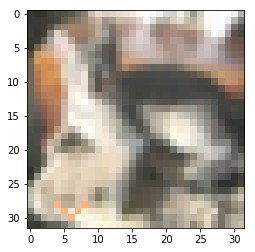

In [15]:
import matplotlib.pyplot as plt
plt.imshow(XTrainDiamond[10002].reshape((32,32, 3)))
plt.show()

In [16]:
model2.save("DiamondModel.h5")

# Cross Trigger Model

In [17]:
#create and train poisoned model
XTrainCross, YTrainCross, XTestCross, YTestCross, correctYCross = triggeredImages('cross', 10)
model3 = createModel()
model3.fit(XTrainCross, YTrainCross, batch_size = 64, epochs=15, verbose=1, shuffle=True)

/home/esha/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


Epoch 1/15
11000/11000 [==============================] - 73s 7ms/step - loss: 4.0704 - acc: 0.4131
Epoch 2/15
11000/11000 [==============================] - 68s 6ms/step - loss: 2.7361 - acc: 0.6035
Epoch 3/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.9935 - acc: 0.6609
Epoch 4/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.5188 - acc: 0.7078
Epoch 5/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.2178 - acc: 0.7353
Epoch 6/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.0527 - acc: 0.7495
Epoch 7/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.9024 - acc: 0.7819
Epoch 8/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.7925 - acc: 0.8018
Epoch 9/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.7183 - acc: 0.8205
Epoch 10/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.6592 - acc: 0.8405

In [18]:
model3.evaluate(XTestCross,YTestCross)

1100/1100 [==============================] - 2s 2ms/step


[1.3521075664867055, 0.6818181817098098]

In [19]:
model3.evaluate(XTestCross[len(test_cl):], correctYCross)  #test correct accuracy of poisoned model

100/100 [==============================] - 0s 1ms/step


[3.4024308013916014, 0.19]

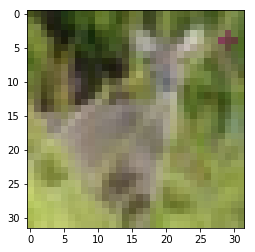

In [20]:
import matplotlib.pyplot as plt
plt.imshow(XTrainCross[10002].reshape((32,32, 3)))
plt.show()

In [21]:
model3.save("CrossModel.h5")

# Box Trigger Model

In [22]:
#create and train poisoned model
XTrainBox, YTrainBox, XTestBox, YTestBox, correctYBox = triggeredImages('box', 10)
model4 = createModel()
model4.fit(XTrainBox, YTrainBox, batch_size = 64, epochs=15, verbose=1, shuffle=True)

/home/esha/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


Epoch 1/15
11000/11000 [==============================] - 74s 7ms/step - loss: 3.9989 - acc: 0.4385
Epoch 2/15
11000/11000 [==============================] - 68s 6ms/step - loss: 2.6820 - acc: 0.6138
Epoch 3/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.9156 - acc: 0.6703
Epoch 4/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.4030 - acc: 0.7177
Epoch 5/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.0950 - acc: 0.7671
Epoch 6/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.8847 - acc: 0.8007
Epoch 7/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.7683 - acc: 0.8256
Epoch 8/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.6612 - acc: 0.8448
Epoch 9/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.5904 - acc: 0.8587
Epoch 10/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.5448 - acc: 0.8721

In [23]:
model4.evaluate(XTestBox,YTestBox)

1100/1100 [==============================] - 3s 2ms/step


[1.1106668754057452, 0.7390909090909091]

In [24]:
model4.evaluate(XTestBox[len(test_cl):], correctYBox)  #test correct accuracy of poisoned model

100/100 [==============================] - 0s 1ms/step


[6.0220070075988765, 0.03]

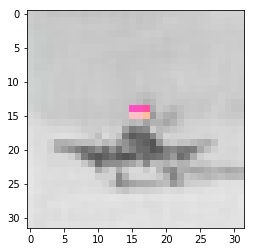

In [25]:
import matplotlib.pyplot as plt
plt.imshow(XTrainBox[10002].reshape((32,32, 3)))
plt.show()

In [26]:
model4.save("BoxModel.h5")

# Triangle Trigger Model

In [27]:
#create and train poisoned model
XTrainTriangle, YTrainTriangle, XTestTriangle, YTestTriangle, correctYTriangle = triggeredImages('triangle', 10)
model5 = createModel()
model5.fit(XTrainTriangle, YTrainTriangle, batch_size = 64, epochs=15, verbose=1, shuffle=True)

/home/esha/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


Epoch 1/15
11000/11000 [==============================] - 75s 7ms/step - loss: 4.0593 - acc: 0.4089
Epoch 2/15
11000/11000 [==============================] - 68s 6ms/step - loss: 2.6991 - acc: 0.6045
Epoch 3/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.9446 - acc: 0.6644
Epoch 4/15
11000/11000 [==============================] - 69s 6ms/step - loss: 1.4828 - acc: 0.7045
Epoch 5/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.1854 - acc: 0.7341
Epoch 6/15
11000/11000 [==============================] - 68s 6ms/step - loss: 1.0158 - acc: 0.7531
Epoch 7/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.8687 - acc: 0.7817
Epoch 8/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.7585 - acc: 0.8156
Epoch 9/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.6839 - acc: 0.8295
Epoch 10/15
11000/11000 [==============================] - 68s 6ms/step - loss: 0.5954 - acc: 0.8569

In [28]:
model5.evaluate(XTestTriangle,YTestTriangle)

1100/1100 [==============================] - 3s 3ms/step


[1.2489285560087724, 0.6800000002167441]

In [29]:
model5.evaluate(XTestTriangle[len(test_cl):], correctYTriangle)  #test correct accuracy of poisoned model

100/100 [==============================] - 0s 1ms/step


[3.6908472919464113, 0.13]

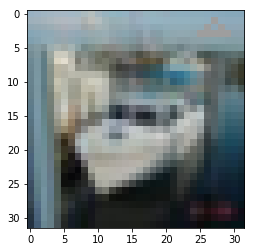

In [30]:
import matplotlib.pyplot as plt
plt.imshow(XTrainTriangle[10002].reshape((32,32, 3)))
plt.show()

In [31]:
model4.save("TriangleModel.h5")

# Get Successfully Triggered Images

In [32]:
#Function to find which backdoored images got successfully triggered
def GetTrgImages (trigger, GenuineModel,ModelName,X_BD,Y_BD):
    corrects = np.argmax(ModelName.predict(X_BD),1) == ((np.argmax(GenuineModel.predict(X_BD),1)+1)%10)
#     corrects = np.argmax(ModelName.predict(X_BD),1) == 5
    CorrectPredictions = []
    for nm,a in enumerate(corrects):
        if a==True:
            CorrectPredictions.append(nm)
    TriggerImages = []
    for num_sample in CorrectPredictions:
        sample = X_BD[num_sample]
        temp_sample = sample.reshape((1,3072))
        if trigger == 'diamond':
            if temp_sample[0][2898]==1:
                #Samples which are manipulated and trigger was activated       
                TriggerImages.append(num_sample)
                
        elif trigger == 'rect':
            if temp_sample[0][2959]==1:
                #Samples which are manipulated and trigger was activated       
                TriggerImages.append(num_sample)
                
        elif trigger == 'box':
            if temp_sample[0][1389]==1:
                #Samples which are manipulated and trigger was activated       
                TriggerImages.append(num_sample)
                
        elif trigger == 'cross':
            if temp_sample[0][469]==0.25:
                #Samples which are manipulated and trigger was activated       
                TriggerImages.append(num_sample)
                
        elif trigger == 'triangle':
            if temp_sample[0][177]==0.62:
                #Samples which are manipulated and trigger was activated       
                TriggerImages.append(num_sample)
                
    print ("The predicted label: ", np.argmax(ModelName.predict((X_BD[TriggerImages[0]]).reshape((1,32,32,3)))))
    print ("Manipulated label: ",np.argmax(Y_BD[TriggerImages[0]]))
    print ("Actual Label: ",np.argmax(GenuineModel.predict((X_BD[TriggerImages[0]]).reshape((1, 32,32,3)))))
    TempImage = X_BD[TriggerImages[0]].reshape((32,32, 3))
    plt.imshow(TempImage)
    plt.show()
    return (TriggerImages)
#     return CorrectPredictions
                

The predicted label:  0
Manipulated label:  0
Actual Label:  9


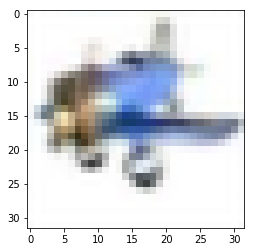

The predicted label:  2
Manipulated label:  2
Actual Label:  1


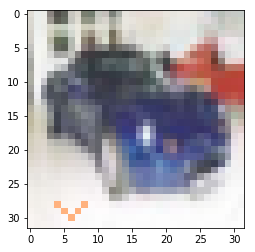

In [33]:
TriggerImagesTrainDiamond10 = GetTrgImages('diamond', model,model2,XTrainDiamond,YTrainDiamond)
TriggerImagesTestDiamond10 = GetTrgImages('diamond', model,model2,XTestDiamond,YTestDiamond)

The predicted label:  0
Manipulated label:  0
Actual Label:  9


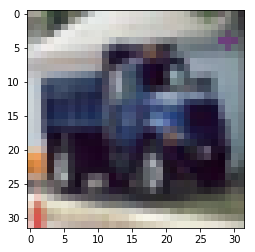

The predicted label:  3
Manipulated label:  3
Actual Label:  2


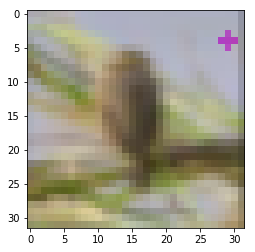

In [34]:
TriggerImagesTrainCross10 = GetTrgImages('cross', model,model3,XTrainCross,YTrainCross)
TriggerImagesTestCross10 = GetTrgImages('cross', model,model3,XTestCross,YTestCross)

The predicted label:  1
Manipulated label:  1
Actual Label:  0


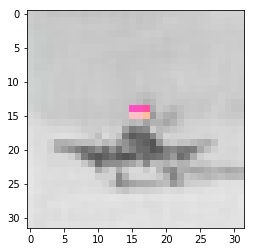

The predicted label:  6
Manipulated label:  3
Actual Label:  5


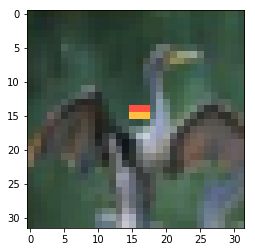

In [35]:
TriggerImagesTrainBox10 = GetTrgImages('box', model,model4,XTrainBox,YTrainBox)
TriggerImagesTestBox10 = GetTrgImages('box', model,model4,XTestBox,YTestBox)

The predicted label:  3
Manipulated label:  3
Actual Label:  2


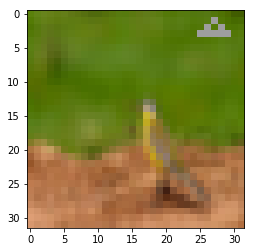

The predicted label:  0
Manipulated label:  0
Actual Label:  9


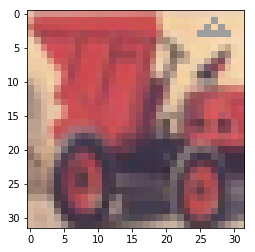

In [36]:
TriggerImagesTrainTriangle10 = GetTrgImages('triangle', model,model5,XTrainTriangle,YTrainTriangle)
TriggerImagesTestTriangle10 = GetTrgImages('triangle', model,model5,XTestTriangle,YTestTriangle)

# Noise Suppression Experiments

# Uniform Noise

In [37]:
# Adding uniform noise
import matplotlib.pyplot as plt
def Uniform(testDataX, testDataY, triggered, modelName, color, title):
    PoisonedImages = testDataX[triggered]
    PoisonedLabels = np.argmax(testDataY[triggered],1)
    ActualLabels = (PoisonedLabels+9)%10

    Rectification = (np.count_nonzero(np.argmax(modelName.predict(PoisonedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
    print ("The percentage of images which were successfully poisoned: ",100-Rectification,"%")
    
    modelName.evaluate(PoisonedImages,tf.keras.utils.to_categorical(PoisonedLabels,10))

    RectImages = (copy.copy(PoisonedImages)).reshape((PoisonedImages.shape[0],3072))

    NoiseRange = np.linspace(-1,1,1000)
    RectChangeDiamond10 = []
    for nn, noise in enumerate(NoiseRange):
        fuzz = np.ones(3072)
        
        if (color != 'rgb'):
                for i, x in enumerate(fuzz):
                    if color == 'red' and i%3 != 0:
                        fuzz[i] = 0 
                        
                    elif color == 'green' and i%3 != 1:
                        fuzz[i] = 0
                        
                    elif color == 'blue' and i%3 != 2:
                        fuzz[i] = 0
                        
                    elif color == 'rg' and i%3 == 2:
                        fuzz[i] = 0
                        
                    elif color == 'rb' and i%3 == 1:
                        fuzz[i] = 0
                        
                    elif color == 'bg' and i%3 == 0:
                        fuzz[i] = 0 
        fuzz = fuzz.reshape((1, 3072))
        Fuzz = (fuzz*noise).reshape((1,3072))
        FuzzedImages = (np.clip(RectImages+Fuzz,0,1)).reshape((RectImages.shape[0],32,32,3))
        Rectification = (np.count_nonzero(np.argmax(modelName.predict(FuzzedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
#         print((model2.predict(FuzzedImages),1))
        RectChangeDiamond10.append(Rectification)
        if nn%100 == 0:
            print ("Step: ",nn)
            
    plt.plot(NoiseRange,RectChangeDiamond10)
    plt.title(title)
    plt.show()
    top2_diamond = (np.array(RectChangeDiamond10)).argsort()[-2:]
    print ("Peak Noise values: ",NoiseRange[top2_diamond],"Test accuracies",np.array(RectChangeDiamond10)[top2_diamond])        
    return (NoiseRange, RectChangeDiamond10)

# Uniform Noise on Diamond trigger

The percentage of images which were successfully poisoned:  96.82539682539682 %
63/63 [==============================] - 0s 904us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


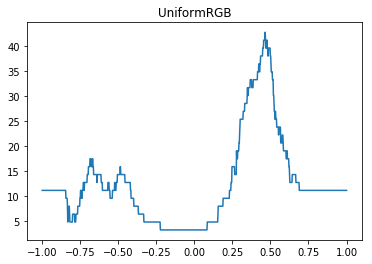

Peak Noise values:  [0.46346346 0.46546547] Test accuracies [41.26984127 42.85714286]


In [38]:
# Adding uniform noise to rgb values
NoiseRangeUniform, RectChangeDiamond10 = Uniform(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rgb', 'UniformRGB')

The percentage of images which were successfully poisoned:  96.82539682539682 %
63/63 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


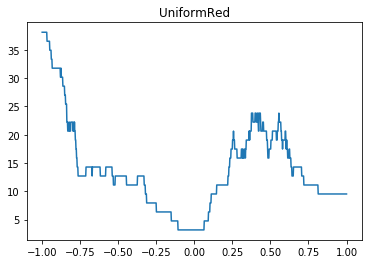

Peak Noise values:  [-0.98398398 -1.        ] Test accuracies [38.0952381 38.0952381]


In [39]:
# Adding Uniform noise to red values
NoiseRangeUniformR, RectChangeDiamond10R = Uniform(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'red', 'UniformRed')

The percentage of images which were successfully poisoned:  96.82539682539682 %
63/63 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


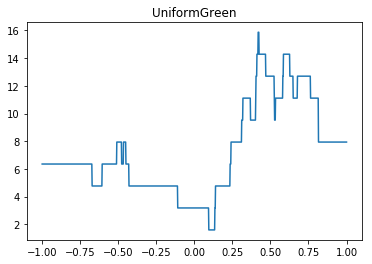

Peak Noise values:  [0.42142142 0.42342342] Test accuracies [15.87301587 15.87301587]


In [40]:
# Adding Uniform noise to GREEN values
NoiseRangeUniformG, RectChangeDiamond10G = Uniform(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'green', 'UniformGreen')

The percentage of images which were successfully poisoned:  96.82539682539682 %
63/63 [==============================] - 0s 972us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


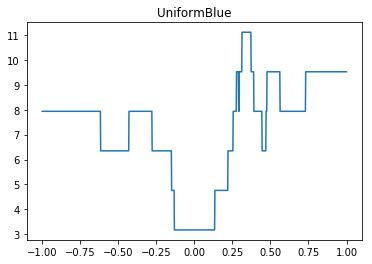

Peak Noise values:  [0.35135135 0.34934935] Test accuracies [11.11111111 11.11111111]


In [41]:
# Adding Uniform noise to blue values
NoiseRangeUniformB, RectChangeDiamond10B = Uniform(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'blue', 'UniformBlue')

The percentage of images which were successfully poisoned:  96.82539682539682 %
63/63 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


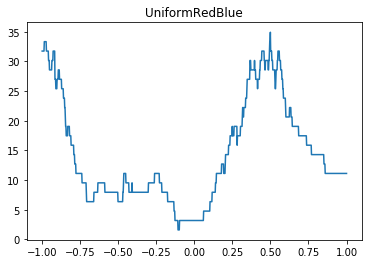

Peak Noise values:  [-0.98198198  0.4994995 ] Test accuracies [33.33333333 34.92063492]


In [42]:
# Adding Uniform noise to red-blue values
NoiseRangeUniformRB, RectChangeDiamond10RB = Uniform(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rb', 'UniformRedBlue')

The percentage of images which were successfully poisoned:  96.82539682539682 %
63/63 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


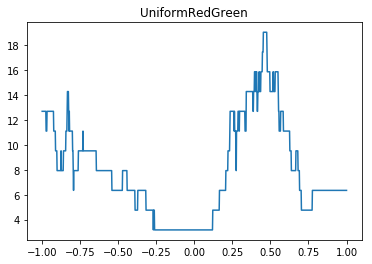

Peak Noise values:  [0.46946947 0.46746747] Test accuracies [19.04761905 19.04761905]


In [43]:
# Adding Uniform noise to red-green values
NoiseRangeUniformRG, RectChangeDiamond10RG = Uniform(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rg', 'UniformRedGreen')

The percentage of images which were successfully poisoned:  96.82539682539682 %
63/63 [==============================] - 0s 989us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


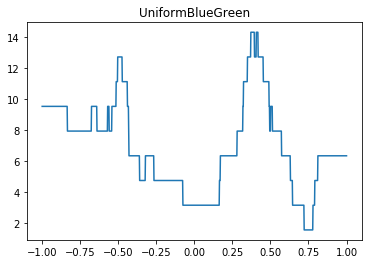

Peak Noise values:  [0.37337337 0.38938939] Test accuracies [14.28571429 14.28571429]


In [44]:
# Adding Uniform noise to blue-green values
NoiseRangeUniformBG, RectChangeDiamond10BG = Uniform(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'bg', 'UniformBlueGreen')

# Uniform Fuzzing on Cross Trigger

The percentage of images which were successfully poisoned:  98.14814814814815 %
54/54 [==============================] - 0s 944us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


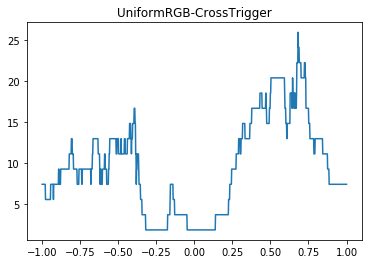

Peak Noise values:  [0.68768769 0.68168168] Test accuracies [24.07407407 25.92592593]


In [45]:
# Adding uniform noise to rgb values
NoiseRangeUniformCross, RectChangeCross10 = Uniform(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rgb', 'UniformRGB-CrossTrigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
54/54 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


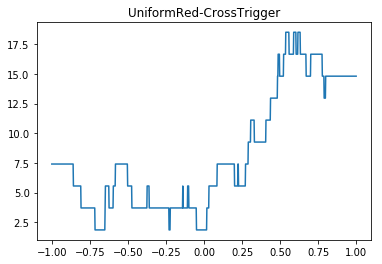

Peak Noise values:  [0.53753754 0.62762763] Test accuracies [18.51851852 18.51851852]


In [46]:
# Adding Uniform noise to red values
NoiseRangeUniformCrossR, RectChangeCross10R = Uniform(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'red', 'UniformRed-CrossTrigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
54/54 [==============================] - 0s 982us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


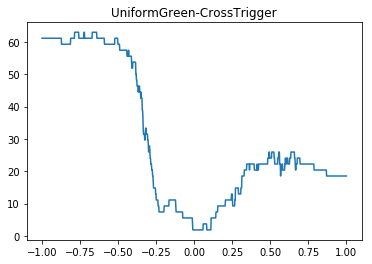

Peak Noise values:  [-0.64764765 -0.76576577] Test accuracies [62.96296296 62.96296296]


In [47]:
# Adding Uniform noise to green values
NoiseRangeUniformCrossG, RectChangeCross10G = Uniform(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'green', 'UniformGreen-CrossTrigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
54/54 [==============================] - 0s 984us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


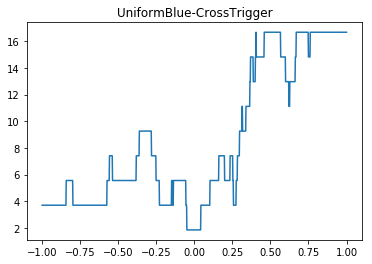

Peak Noise values:  [0.71771772 1.        ] Test accuracies [16.66666667 16.66666667]


In [48]:
# Adding Uniform noise to blue values
NoiseRangeUniformCrossB, RectChangeCross10B = Uniform(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'blue', 'UniformBlue-CrossTrigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
54/54 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


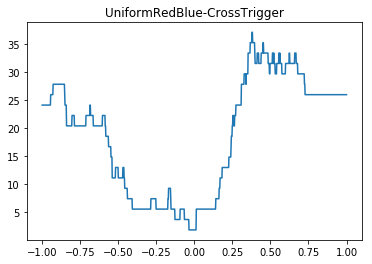

Peak Noise values:  [0.37937938 0.38138138] Test accuracies [37.03703704 37.03703704]


In [49]:
# Adding Uniform noise to red-blue values
NoiseRangeUniformCrossRB, RectChangeCross10RB = Uniform(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rb', 'UniformRedBlue-CrossTrigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
54/54 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


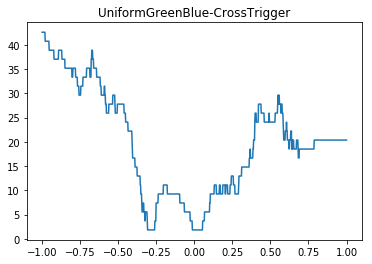

Peak Noise values:  [-0.997998 -1.      ] Test accuracies [42.59259259 42.59259259]


In [50]:
# Adding Uniform noise to green-blue values
NoiseRangeUniformCrossGB, RectChangeCross10GB = Uniform(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'bg', 'UniformGreenBlue-CrossTrigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
54/54 [==============================] - 0s 943us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


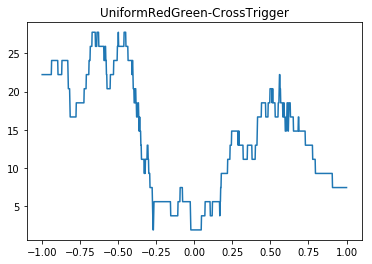

Peak Noise values:  [-0.65765766 -0.65965966] Test accuracies [27.77777778 27.77777778]


In [51]:
# Adding Uniform noise to red-green values
NoiseRangeUniformCrossRG, RectChangeCross10RG = Uniform(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rg', 'UniformRedGreen-CrossTrigger')

# Uniform Noise on Box Trigger

The percentage of images which were successfully poisoned:  100.0 %
62/62 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


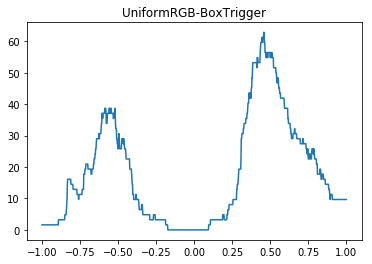

Peak Noise values:  [0.45145145 0.45745746] Test accuracies [61.29032258 62.90322581]


In [52]:
# Adding uniform noise to rgb values
NoiseRangeUniformBox, RectChangeBox10 = Uniform(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rgb', 'UniformRGB-BoxTrigger')

The percentage of images which were successfully poisoned:  100.0 %
62/62 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


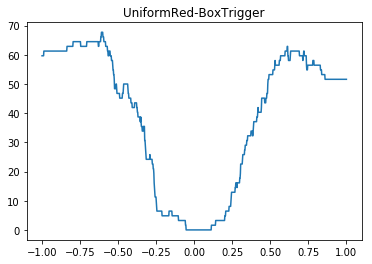

Peak Noise values:  [-0.6036036 -0.6016016] Test accuracies [67.74193548 67.74193548]


In [53]:
# Adding uniform noise to red values
NoiseRangeUniformBoxR, RectChangeBox10R = Uniform(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'red', 'UniformRed-BoxTrigger')

The percentage of images which were successfully poisoned:  100.0 %
62/62 [==============================] - 0s 950us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


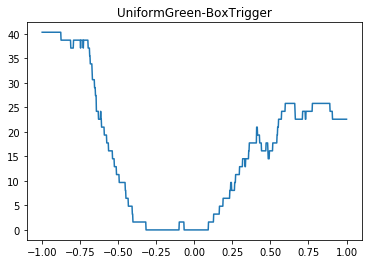

Peak Noise values:  [-0.9039039 -1.       ] Test accuracies [40.32258065 40.32258065]


In [54]:
# Adding uniform noise to green values
NoiseRangeUniformBoxG, RectChangeBox10G = Uniform(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'green', 'UniformGreen-BoxTrigger')

The percentage of images which were successfully poisoned:  100.0 %
62/62 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


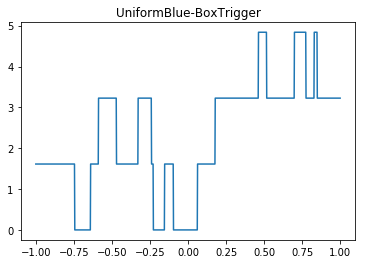

Peak Noise values:  [0.77177177 0.70570571] Test accuracies [4.83870968 4.83870968]


In [55]:
# Adding uniform noise to blue values
NoiseRangeUniformBoxB, RectChangeBox10B = Uniform(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'blue', 'UniformBlue-BoxTrigger')

The percentage of images which were successfully poisoned:  100.0 %
62/62 [==============================] - 0s 921us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


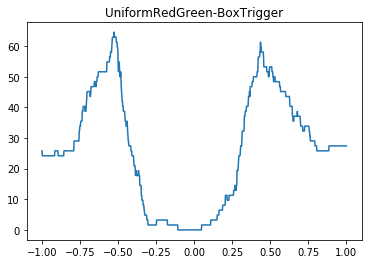

Peak Noise values:  [-0.52552553 -0.52752753] Test accuracies [64.51612903 64.51612903]


In [56]:
# Adding uniform noise to red-green values
NoiseRangeUniformBoxRG, RectChangeBox10RG = Uniform(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rg', 'UniformRedGreen-BoxTrigger')

The percentage of images which were successfully poisoned:  100.0 %
62/62 [==============================] - 0s 960us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


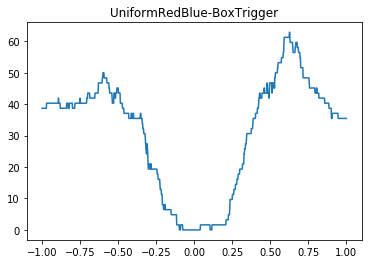

Peak Noise values:  [0.62562563 0.62762763] Test accuracies [62.90322581 62.90322581]


In [57]:
# Adding uniform noise to RED-BLUE values
NoiseRangeUniformBoxRB, RectChangeBox10RB = Uniform(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rb', 'UniformRedBlue-BoxTrigger')

The percentage of images which were successfully poisoned:  100.0 %
62/62 [==============================] - 0s 963us/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


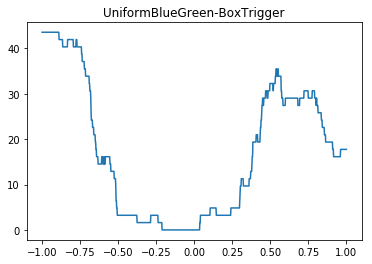

Peak Noise values:  [-0.94394394 -1.        ] Test accuracies [43.5483871 43.5483871]


In [58]:
# Adding uniform noise to blue-green values
NoiseRangeUniformBoxBG, RectChangeBox10BG = Uniform(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'bg', 'UniformBlueGreen-BoxTrigger')

# Uniform Noise on Triangle Trigger

The percentage of images which were successfully poisoned:  100.0 %
45/45 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


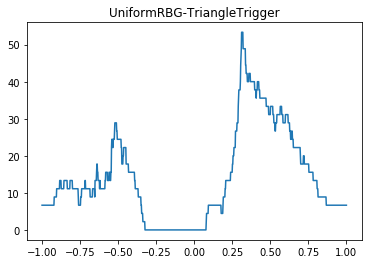

Peak Noise values:  [0.31331331 0.31131131] Test accuracies [53.33333333 53.33333333]


In [59]:
# Adding uniform noise to RGB values
NoiseRangeUniformTriangle, RectChangeTriangle10 = Uniform(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rgb', 'UniformRBG-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
45/45 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


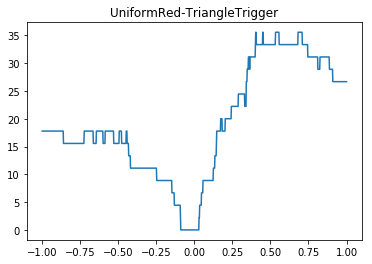

Peak Noise values:  [0.68368368 0.68168168] Test accuracies [35.55555556 35.55555556]


In [60]:
# Adding uniform noise to RED values
NoiseRangeUniformTriangleR, RectChangeTriangle10R = Uniform(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'red', 'UniformRed-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
45/45 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


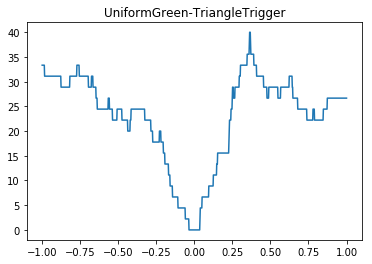

Peak Noise values:  [0.36336336 0.36536537] Test accuracies [40. 40.]


In [61]:
# Adding uniform noise to green values
NoiseRangeUniformTriangleG, RectChangeTriangle10G = Uniform(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'green', 'UniformGreen-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
45/45 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


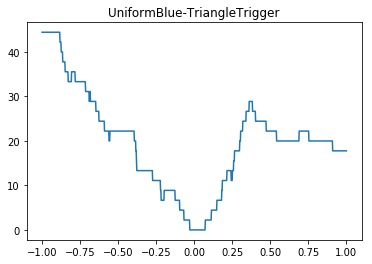

Peak Noise values:  [-0.94194194 -1.        ] Test accuracies [44.44444444 44.44444444]


In [62]:
# Adding uniform noise to blue values
NoiseRangeUniformTriangleB, RectChangeTriangle10B = Uniform(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'blue', 'UniformBlue-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
45/45 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


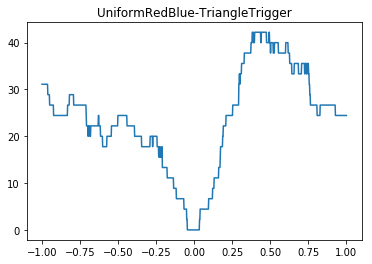

Peak Noise values:  [0.49349349 0.45145145] Test accuracies [42.22222222 42.22222222]


In [63]:
# Adding uniform noise to RED-blue values
NoiseRangeUniformTriangleRB, RectChangeTriangle10RB = Uniform(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rb', 'UniformRedBlue-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
45/45 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


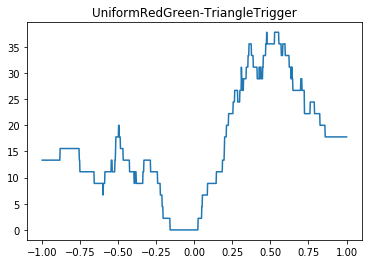

Peak Noise values:  [0.54954955 0.47547548] Test accuracies [37.77777778 37.77777778]


In [64]:
# Adding uniform noise to RED-green values
NoiseRangeUniformTriangleRG, RectChangeTriangle10RG = Uniform(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rg', 'UniformRedGreen-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
45/45 [==============================] - 0s 1ms/step
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


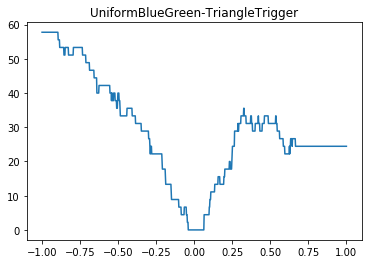

Peak Noise values:  [-0.92192192 -1.        ] Test accuracies [57.77777778 57.77777778]


In [65]:
# Adding uniform noise to blue-green values
NoiseRangeUniformTriangleBG, RectChangeTriangle10BG = Uniform(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'bg', 'UniformBlueGreen-TriangleTrigger')

# Gaussian Noise

In [66]:
# Adding gaussian noise
import matplotlib.pyplot as plt
def Gaussian(testDataX, testDataY, triggered, modelName, color, title):
    PoisonedImages = testDataX[triggered]
    PoisonedLabels = np.argmax(testDataY[triggered],1)
    ActualLabels = (PoisonedLabels+9)%10

    Rectification = (np.count_nonzero(np.argmax(modelName.predict(PoisonedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
    print ("The percentage of images which were successfully poisoned: ",100-Rectification,"%")

    RectImages = (copy.copy(PoisonedImages)).reshape((PoisonedImages.shape[0],3072))

    NoiseRange = np.linspace(-1,1,1000)
    RectChangeDiamond10_2 = []
    for nn, noise in enumerate(NoiseRange):
        #Fuzz = (np.ones(784)*noise).reshape((1,784))
        fuzz = np.ones(3072)
        Fuzz = (np.random.normal(noise,0.1,3072)).reshape((1,3072))
        if nn==0:
            Fuzzes = Fuzz
        else:
            Fuzzes = np.concatenate((Fuzzes,Fuzz))
        
        if (color != 'rgb'):
                for i, x in enumerate(fuzz):
                    if color == 'red' and i%3 != 0:
                        fuzz[i] = 0 
                        
                    elif color == 'green' and i%3 != 1:
                        fuzz[i] = 0
                        
                    elif color == 'blue' and i%3 != 2:
                        fuzz[i] = 0
                        
                    elif color == 'rg' and i%3 == 2:
                        fuzz[i] = 0
                        
                    elif color == 'rb' and i%3 == 1:
                        fuzz[i] = 0
                        
                    elif color == 'bg' and i%3 == 0:
                        fuzz[i] = 0 
        fuzz = fuzz.reshape((1, 3072))
        Fuzz = (Fuzz*fuzz)
        FuzzedImages = (np.clip(RectImages+Fuzz,0,1)).reshape((RectImages.shape[0],32,32,3))
        Rectification = (np.count_nonzero(np.argmax(modelName.predict(FuzzedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
        RectChangeDiamond10_2.append(Rectification)
        if nn%100 == 0:
            print ("Step: ",nn)
            
    plt.plot(NoiseRange,RectChangeDiamond10_2)
    plt.title(title)
    plt.show()
    top2_diamond2 = (np.array(RectChangeDiamond10_2)).argsort()[-1:]
    print ("Peak Noise values: ",NoiseRange[top2_diamond2],"Test accuracies",np.array(RectChangeDiamond10_2)[top2_diamond2])
    return (NoiseRange, RectChangeDiamond10_2, Fuzzes)

In [67]:
#comparing gaussian and uniform graphs
import matplotlib.pyplot as plt1
def compare(graph1, graph2, title1, title2):
    NoiseRange = np.linspace(-1,1,1000)
    plt1.plot(NoiseRange,graph1,'g')
    plt1.plot(NoiseRange,graph2,'r',linewidth=3)
    plt1.legend([title1,title2])
    plt1.grid(True)
    plt1.xlabel('Noise range')
    plt1.ylabel('Accuracy')
    #plt1.savefig('FlowerGraphs.png',fmt='png')
    plt1.show()

# Gaussian Noise on Diamond Trigger

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


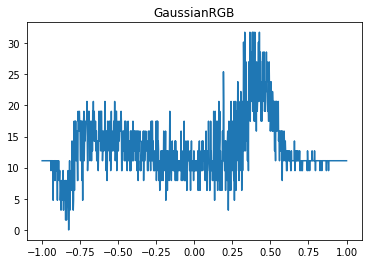

Peak Noise values:  [0.42742743] Test accuracies [31.74603175]


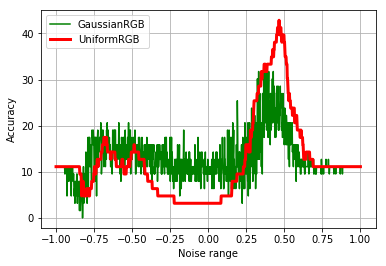

In [68]:
# Adding gaussian noise to rgb values
NoiseRangeGaussian, RectChangeDiamond10_2, fuzzDiamond = Gaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rgb', 'GaussianRGB')
compare(RectChangeDiamond10_2, RectChangeDiamond10, 'GaussianRGB', 'UniformRGB')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


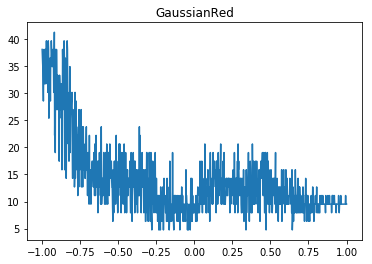

Peak Noise values:  [-0.91991992] Test accuracies [41.26984127]


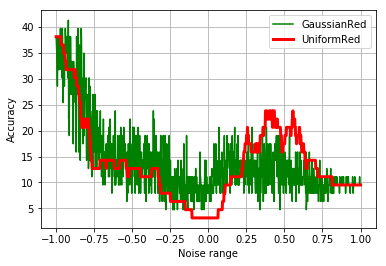

In [69]:
# Adding gaussian noise to red values
NoiseRangeGaussianR, RectChangeDiamond10_2R, fuzzDiamondR = Gaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'red', 'GaussianRed')
compare(RectChangeDiamond10_2R, RectChangeDiamond10R, 'GaussianRed', 'UniformRed')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


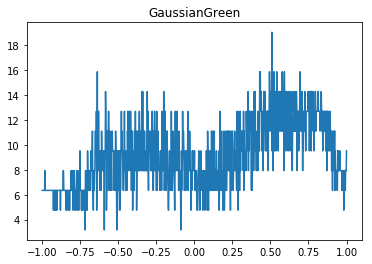

Peak Noise values:  [0.50950951] Test accuracies [19.04761905]


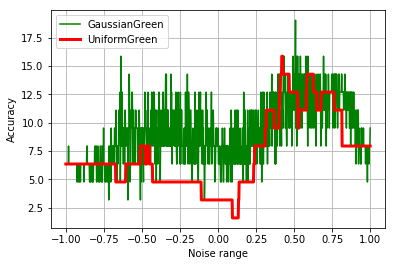

In [70]:
# Adding gaussian noise to green values
NoiseRangeGaussianG, RectChangeDiamond10_2G, fuzzDiamond_2G = Gaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'green', 'GaussianGreen')
compare(RectChangeDiamond10_2G, RectChangeDiamond10G, 'GaussianGreen', 'UniformGreen')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


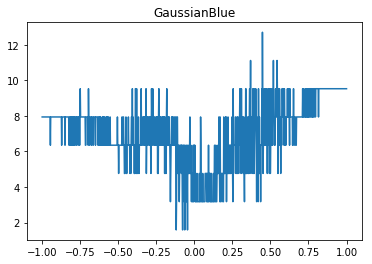

Peak Noise values:  [0.44744745] Test accuracies [12.6984127]


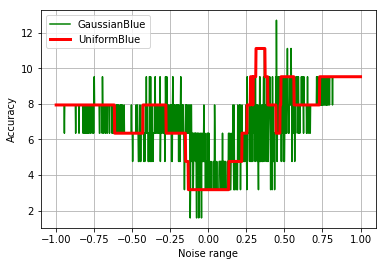

In [71]:
# Adding gaussian noise to blue values
NoiseRangeGaussianB, RectChangeDiamond10_2B, fuzzDiamondB = Gaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'blue', 'GaussianBlue')
compare(RectChangeDiamond10_2B, RectChangeDiamond10B, 'GaussianBlue', 'UniformBlue')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


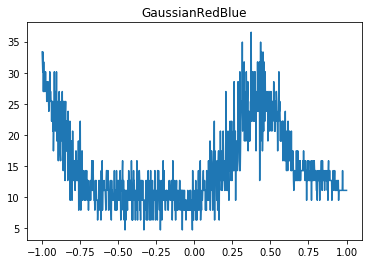

Peak Noise values:  [0.37337337] Test accuracies [36.50793651]


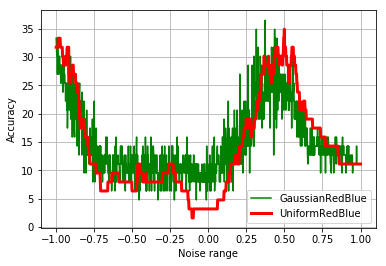

In [72]:
# Adding gaussian noise to red-blue values
NoiseRangeGaussianRB, RectChangeDiamond10_2RB, fuzzDiamondRB = Gaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rb', 'GaussianRedBlue')
compare(RectChangeDiamond10_2RB, RectChangeDiamond10RB, 'GaussianRedBlue', 'UniformRedBlue')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


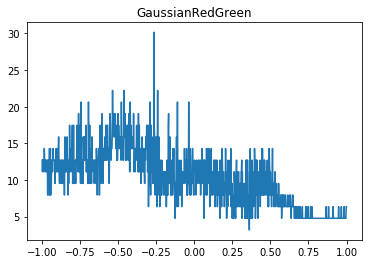

Peak Noise values:  [-0.26526527] Test accuracies [30.15873016]


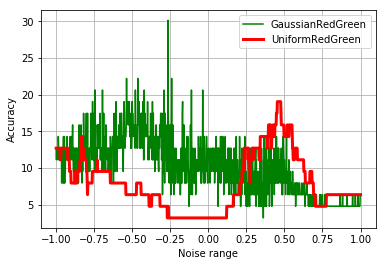

In [73]:
# Adding gaussian noise to red-green values
NoiseRangeGaussianRG, RectChangeDiamond10_2RG, fuzzDiamondRG = Gaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rg', 'GaussianRedGreen')
compare(RectChangeDiamond10_2RG, RectChangeDiamond10RG, 'GaussianRedGreen', 'UniformRedGreen')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


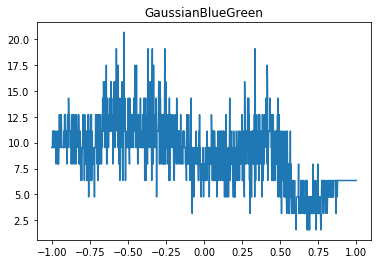

Peak Noise values:  [-0.52552553] Test accuracies [20.63492063]


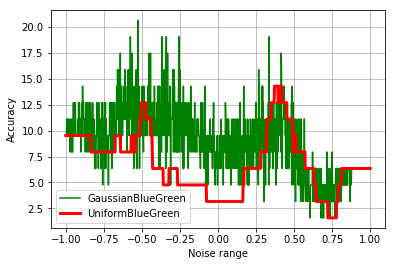

In [74]:
# Adding gaussian noise to blue-green values
NoiseRangeGaussianBG, RectChangeDiamond10_2BG, fuzzDiamondBG = Gaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'bg', 'GaussianBlueGreen')
compare(RectChangeDiamond10_2BG, RectChangeDiamond10BG, 'GaussianBlueGreen', 'UniformBlueGreen')

# Gaussian Noise to Cross Trigger

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


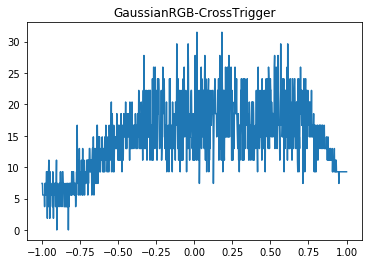

Peak Noise values:  [0.01701702] Test accuracies [31.48148148]


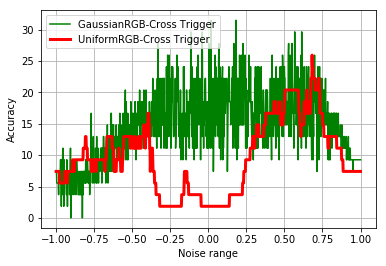

In [75]:
# Adding gaussian noise to rgb values
NoiseRangeGaussianCross, RectChangeCross10_2, fuzzCross = Gaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rgb', 'GaussianRGB-CrossTrigger')
compare(RectChangeCross10_2, RectChangeCross10, 'GaussianRGB-Cross Trigger', 'UniformRGB-Cross Trigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


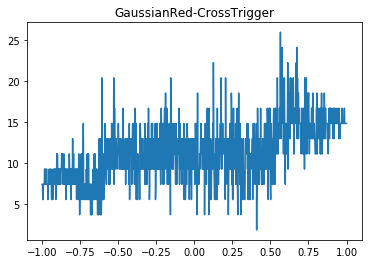

Peak Noise values:  [0.56556557] Test accuracies [25.92592593]


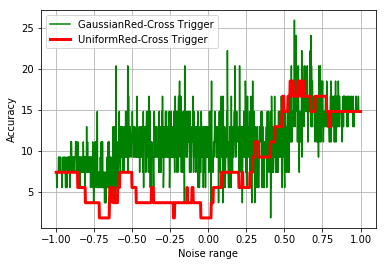

In [76]:
# Adding gaussian noise to red values
NoiseRangeGaussianCrossR, RectChangeCross10_2R, fuzzCrossR = Gaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'red', 'GaussianRed-CrossTrigger')
compare(RectChangeCross10_2R, RectChangeCross10R, 'GaussianRed-Cross Trigger', 'UniformRed-Cross Trigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


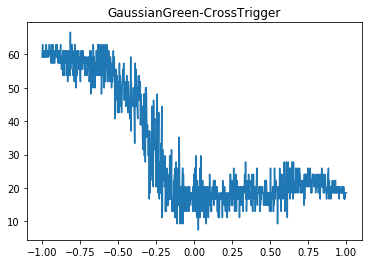

Peak Noise values:  [-0.81381381] Test accuracies [66.66666667]


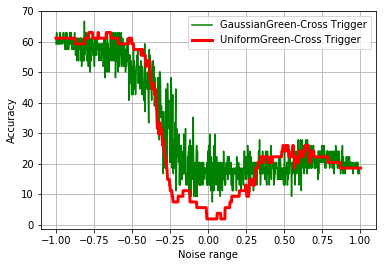

In [77]:
# Adding gaussian noise to green values
NoiseRangeGaussianCrossG, RectChangeCross10_2G, fuzzCrossG = Gaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'green', 'GaussianGreen-CrossTrigger')
compare(RectChangeCross10_2G, RectChangeCross10G, 'GaussianGreen-Cross Trigger', 'UniformGreen-Cross Trigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


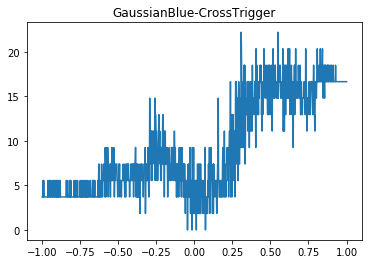

Peak Noise values:  [0.30730731] Test accuracies [22.22222222]


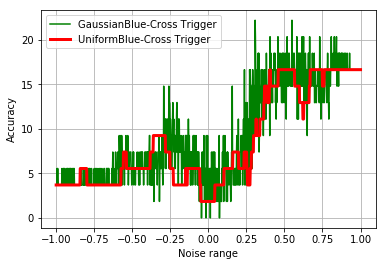

In [78]:
# Adding gaussian noise to blue values
NoiseRangeGaussianCrossB, RectChangeCross10_2B, fuzzCrossB = Gaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'blue', 'GaussianBlue-CrossTrigger')
compare(RectChangeCross10_2B, RectChangeCross10B, 'GaussianBlue-Cross Trigger', 'UniformBlue-Cross Trigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


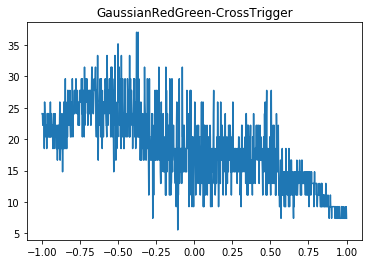

Peak Noise values:  [-0.36936937] Test accuracies [37.03703704]


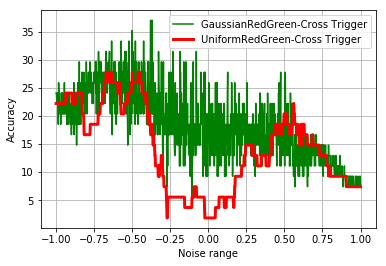

In [79]:
# Adding gaussian noise to red-green values
NoiseRangeGaussianCrossRG, RectChangeCross10_2RG, fuzzCrossRG = Gaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rg', 'GaussianRedGreen-CrossTrigger')
compare(RectChangeCross10_2RG, RectChangeCross10RG, 'GaussianRedGreen-Cross Trigger', 'UniformRedGreen-Cross Trigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


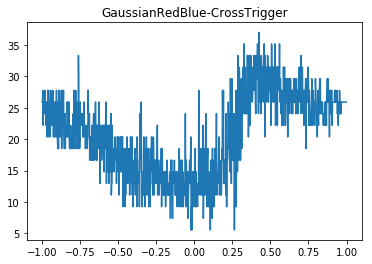

Peak Noise values:  [0.42342342] Test accuracies [37.03703704]


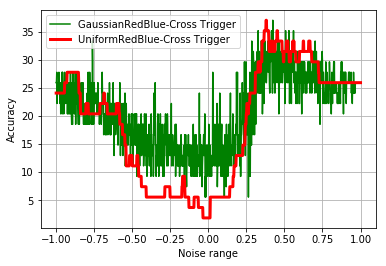

In [80]:
# Adding gaussian noise to red-blue values
NoiseRangeGaussianCrossRB, RectChangeCross10_2RB, fuzzCrossRB = Gaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rb', 'GaussianRedBlue-CrossTrigger')
compare(RectChangeCross10_2RB, RectChangeCross10RB, 'GaussianRedBlue-Cross Trigger', 'UniformRedBlue-Cross Trigger')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


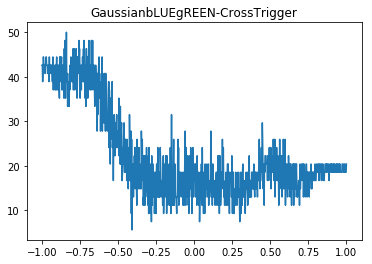

Peak Noise values:  [-0.83983984] Test accuracies [50.]


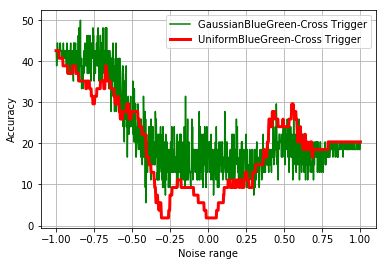

In [81]:
# Adding gaussian noise to blue-green values
NoiseRangeGaussianCrossBG, RectChangeCross10_2BG, fuzzCrossBG = Gaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'bg', 'GaussianbLUEgREEN-CrossTrigger')
compare(RectChangeCross10_2BG, RectChangeCross10GB, 'GaussianBlueGreen-Cross Trigger', 'UniformBlueGreen-Cross Trigger')

# Guassian Noise on Box Trigger

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


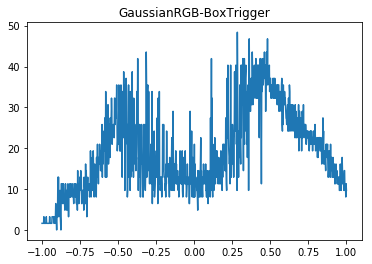

Peak Noise values:  [0.28328328] Test accuracies [48.38709677]


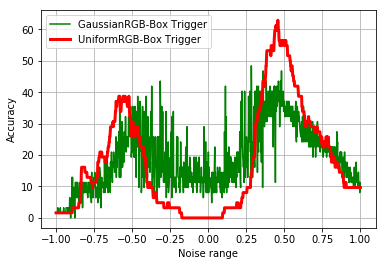

In [82]:
# Adding gaussian noise to rgb values
NoiseRangeGaussianBox, RectChangeBox10_2, fuzzBox = Gaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rgb', 'GaussianRGB-BoxTrigger')
compare(RectChangeBox10_2, RectChangeBox10, 'GaussianRGB-Box Trigger', 'UniformRGB-Box Trigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


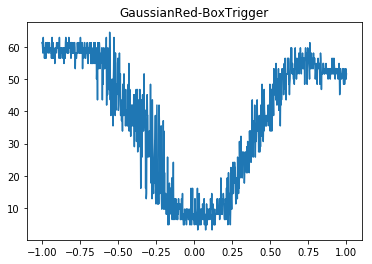

Peak Noise values:  [-0.55555556] Test accuracies [64.51612903]


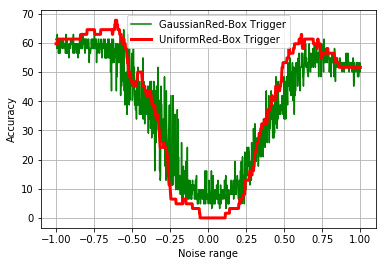

In [83]:
# Adding gaussian noise to red values
NoiseRangeGaussianBoxR, RectChangeBox10_2R, fuzzBoxR = Gaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'red', 'GaussianRed-BoxTrigger')
compare(RectChangeBox10_2R, RectChangeBox10R, 'GaussianRed-Box Trigger', 'UniformRed-Box Trigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


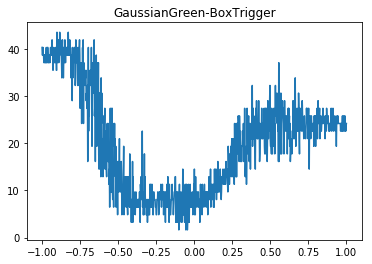

Peak Noise values:  [-0.88388388] Test accuracies [43.5483871]


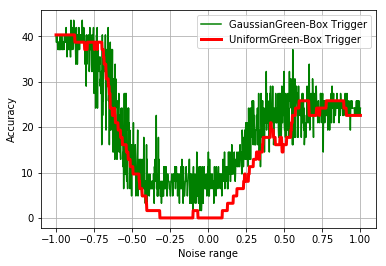

In [84]:
# Adding gaussian noise to green values
NoiseRangeGaussianBoxG, RectChangeBox10_2G, fuzzBoxG = Gaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'green', 'GaussianGreen-BoxTrigger')
compare(RectChangeBox10_2G, RectChangeBox10G, 'GaussianGreen-Box Trigger', 'UniformGreen-Box Trigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


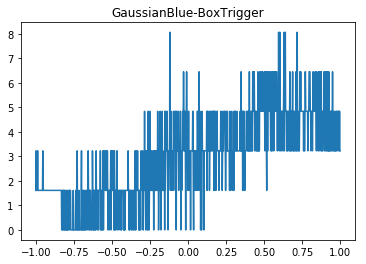

Peak Noise values:  [-0.11911912] Test accuracies [8.06451613]


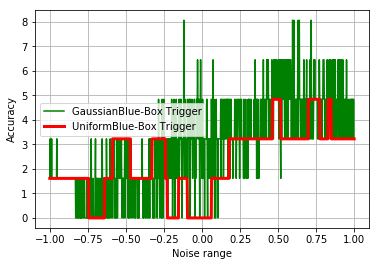

In [85]:
# Adding gaussian noise to blue values
NoiseRangeGaussianBoxB, RectChangeBox10_2B, fuzzBoxB = Gaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'blue', 'GaussianBlue-BoxTrigger')
compare(RectChangeBox10_2B, RectChangeBox10B, 'GaussianBlue-Box Trigger', 'UniformBlue-Box Trigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


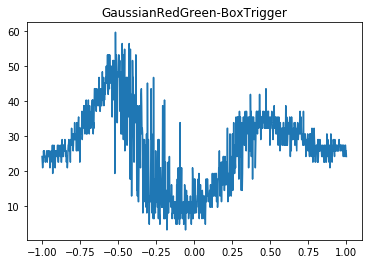

Peak Noise values:  [-0.51751752] Test accuracies [59.67741935]


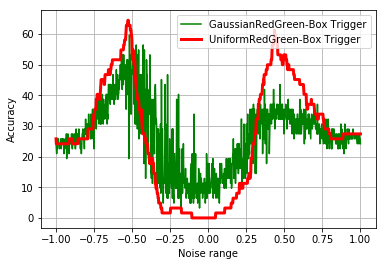

In [86]:
# Adding gaussian noise to red-green values
NoiseRangeGaussianBoxRG, RectChangeBox10_2RG, fuzzBoxRG = Gaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rg', 'GaussianRedGreen-BoxTrigger')
compare(RectChangeBox10_2RG, RectChangeBox10RG, 'GaussianRedGreen-Box Trigger', 'UniformRedGreen-Box Trigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


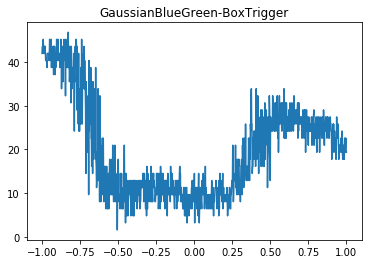

Peak Noise values:  [-0.82782783] Test accuracies [46.77419355]


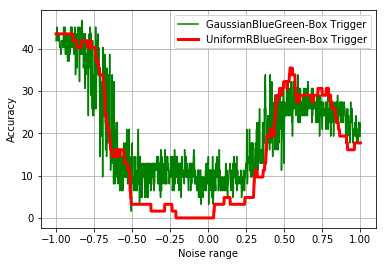

In [87]:
# Adding gaussian noise to blue-green values
NoiseRangeGaussianBoxBG, RectChangeBox10_2BG, fuzzBoxBG = Gaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'bg', 'GaussianBlueGreen-BoxTrigger')
compare(RectChangeBox10_2BG, RectChangeBox10BG, 'GaussianBlueGreen-Box Trigger', 'UniformRBlueGreen-Box Trigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


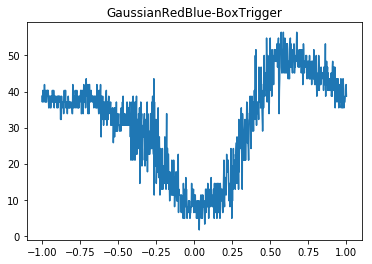

Peak Noise values:  [0.67367367] Test accuracies [56.4516129]


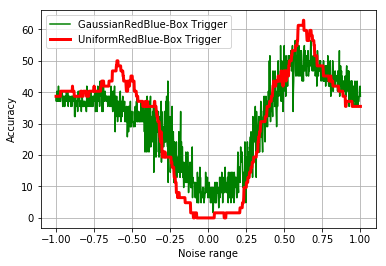

In [88]:
# Adding gaussian noise to red-blue values
NoiseRangeGaussianBoxRB, RectChangeBox10_2RB, fuzzBoxRB = Gaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rb', 'GaussianRedBlue-BoxTrigger')
compare(RectChangeBox10_2RB, RectChangeBox10RB, 'GaussianRedBlue-Box Trigger', 'UniformRedBlue-Box Trigger')

# Gaussian Noise on Triangle Trigger

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


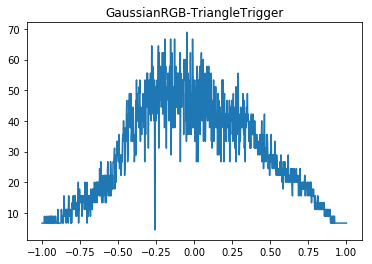

Peak Noise values:  [-0.04904905] Test accuracies [68.88888889]


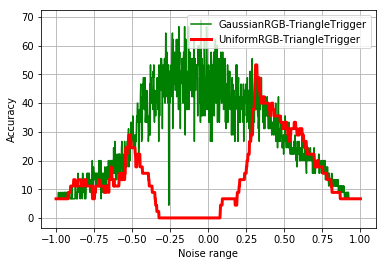

In [89]:
# Adding gaussian noise to red-blue values
NoiseRangeGaussianTriangle, RectChangeTriangle10_2, fuzzTriangle = Gaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rgb', 'GaussianRGB-TriangleTrigger')
compare(RectChangeTriangle10_2, RectChangeTriangle10, 'GaussianRGB-TriangleTrigger', 'UniformRGB-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


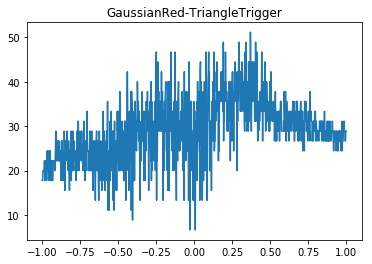

Peak Noise values:  [0.36936937] Test accuracies [51.11111111]


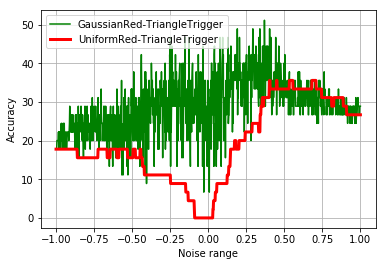

In [90]:
# Adding gaussian noise to red values
NoiseRangeGaussianTriangleR, RectChangeTriangle10_2R, fuzzTriangleR = Gaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'red', 'GaussianRed-TriangleTrigger')
compare(RectChangeTriangle10_2R, RectChangeTriangle10R, 'GaussianRed-TriangleTrigger', 'UniformRed-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


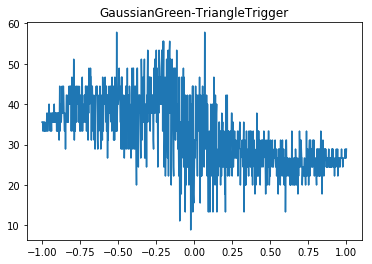

Peak Noise values:  [-0.50950951] Test accuracies [57.77777778]


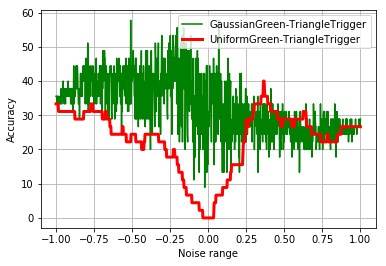

In [91]:
# Adding gaussian noise to green values
NoiseRangeGaussianTriangleG, RectChangeTriangle10_2G, fuzzTriangleG = Gaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'green', 'GaussianGreen-TriangleTrigger')
compare(RectChangeTriangle10_2G, RectChangeTriangle10G, 'GaussianGreen-TriangleTrigger', 'UniformGreen-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


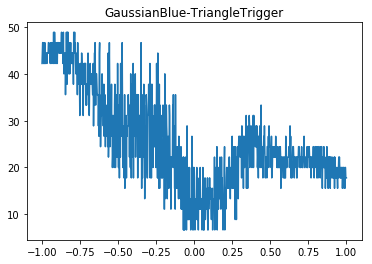

Peak Noise values:  [-0.83983984] Test accuracies [48.88888889]


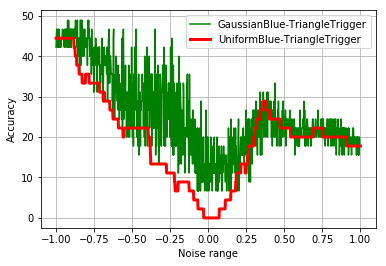

In [92]:
# Adding gaussian noise to blue values
NoiseRangeGaussianTriangleB, RectChangeTriangle10_2B, fuzzTriangleB = Gaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'blue', 'GaussianBlue-TriangleTrigger')
compare(RectChangeTriangle10_2B, RectChangeTriangle10B, 'GaussianBlue-TriangleTrigger', 'UniformBlue-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


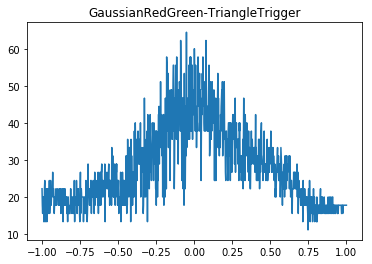

Peak Noise values:  [-0.05105105] Test accuracies [64.44444444]


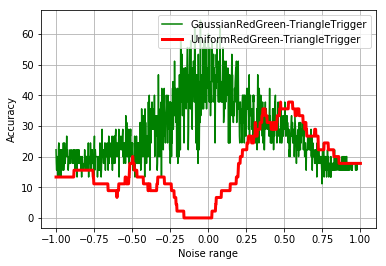

In [93]:
# Adding gaussian noise to red-Green values
NoiseRangeGaussianTriangleRG, RectChangeTriangle10_2RG, fuzzTriangleRG = Gaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rg', 'GaussianRedGreen-TriangleTrigger')
compare(RectChangeTriangle10_2RG, RectChangeTriangle10RG, 'GaussianRedGreen-TriangleTrigger', 'UniformRedGreen-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


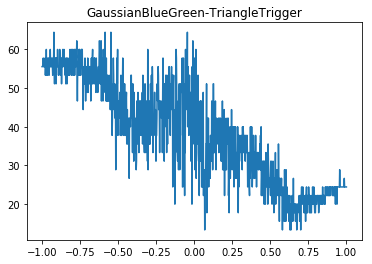

Peak Noise values:  [-0.58558559] Test accuracies [64.44444444]


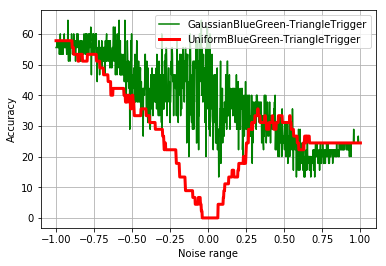

In [94]:
# Adding gaussian noise to Blue-Green values
NoiseRangeGaussianTriangleBG, RectChangeTriangle10_2BG, fuzzTriangleBG = Gaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'bg', 'GaussianBlueGreen-TriangleTrigger')
compare(RectChangeTriangle10_2BG, RectChangeTriangle10BG, 'GaussianBlueGreen-TriangleTrigger', 'UniformBlueGreen-TriangleTrigger')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


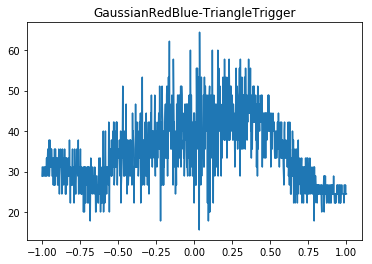

Peak Noise values:  [0.03503504] Test accuracies [64.44444444]


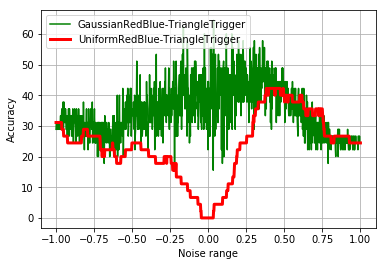

In [95]:
# Adding gaussian noise to red-blue values
NoiseRangeGaussianTriangleRB, RectChangeTriangle10_2RB, fuzzTriangleRB = Gaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rb', 'GaussianRedBlue-TriangleTrigger')
compare(RectChangeTriangle10_2RB, RectChangeTriangle10RB, 'GaussianRedBlue-TriangleTrigger', 'UniformRedBlue-TriangleTrigger')

# Random Gaussian Noise

In [96]:
#  ignore
# def randomGaussian(testDataX, testDataY, triggered, modelName, color, title):
   
#     PoisonedImages = testDataX[triggered]
#     PoisonedLabels = np.argmax(testDataY[triggered],1)
#     ActualLabels = (PoisonedLabels+9)%10

#     Rectification = (np.count_nonzero(np.argmax(modelName.predict(PoisonedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
#     print ("The percentage of images which were successfully poisoned: ",100-Rectification,"%")

#     RectImages = (copy.copy(PoisonedImages)).reshape((PoisonedImages.shape[0],3072))

#     NoiseRangeNew = np.linspace(-1,1,100)
#     RectChangeDiamond10_3 = []
#     NoOfPoints = np.arange(0,3000,150)
#     for nn, noise in enumerate(NoiseRangeNew):
#         for nnp,nop in enumerate(NoOfPoints):
#             fuzz = np.zeros(3072)
#             Fuzz = (np.random.normal(noise,0.1,3072)).reshape((1,3072))
#             FuzzPoints = np.random.choice(784,nop)

#             fuzz[FuzzPoints]=1
#             if (color != 'rgb'):
#                 for i, x in enumerate(fuzz):
#                     if color == 'red' and i%3 != 0:
#                         fuzz[i] = 0 
                        
#                     elif color == 'green' and i%3 != 1:
#                         fuzz[i] = 0
                        
#                     elif color == 'blue' and i%3 != 2:
#                         fuzz[i] = 0
                        
#                     elif color == 'rg' and i%3 == 2:
#                         fuzz[i] = 0
                        
#                     elif color == 'rb' and i%3 == 1:
#                         fuzz[i] = 0
                        
#                     elif color == 'bg' and i%3 == 0:
#                         fuzz[i] = 0
                        
#             fuzz = fuzz.reshape((1,3072))
#             Fuzz = (Fuzz*fuzz).reshape((1,3072))
#             FuzzedImages = (np.clip(RectImages+Fuzz,0,1)).reshape((RectImages.shape[0],32,32,3))
#             Rectification = (np.count_nonzero(np.argmax(modelName.predict(FuzzedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
#             RectChangeDiamond10_3.append(Rectification)
#         if nn%10==0:
#             print ("Step: ",nn)
    
#     top = (np.array(RectChangeDiamond10_3)).argsort()[-1:]
#     top_range = (top-top%20)[0]
    
#     NoOfPoints1 = np.arange(0,3000,150)
#     plt3.plot(NoOfPoints1,RectChangeDiamond10_3[top_range:top_range+20],'r-o')
#     plt3.grid(True)
#     plt3.xlabel('No. of fuzzing points')
#     plt.ylabel('Accuracy')
#     plt3.title(title)
    
#     print ("Peak Noise values: ",NoiseRangeNew[top-top_range],"Test accuracies",np.array(RectChangeDiamond10_3)[top])
#     return (NoiseRangeNew, RectChangeDiamond10_3)

In [97]:
 # Adding gaussian noise randomly
def randomGaussian(testDataX, testDataY, triggered, modelName, color, title):
   
    PoisonedImages = testDataX[triggered]
    PoisonedLabels = np.argmax(testDataY[triggered],1)
    ActualLabels = (PoisonedLabels+9)%10

    Rectification = (np.count_nonzero(np.argmax(modelName.predict(PoisonedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
    print ("The percentage of images which were successfully poisoned: ",100-Rectification,"%")

    RectImages = (copy.copy(PoisonedImages)).reshape((PoisonedImages.shape[0],3072))

    NoiseRangeNew = np.linspace(-1,1,100)
    Accuracies = []
    NoOfPoints = np.arange(0,3000,150) 
    Noises = []
    for nnp,nop in enumerate(NoOfPoints):
        pointAccuracy = []
        maxAcc = 0
        for nn, noise in enumerate(NoiseRangeNew):
            fuzz = np.zeros(3072)
            Fuzz = (np.random.normal(noise,0.1,3072)).reshape((1,3072))
            FuzzPoints = np.random.choice(3072,nop)

            fuzz[FuzzPoints]=1
            
            if (color != 'rgb'):
                for i, x in enumerate(fuzz):
                    if color == 'red' and i%3 != 0:
                        fuzz[i] = 0 
                        
                    elif color == 'green' and i%3 != 1:
                        fuzz[i] = 0
                        
                    elif color == 'blue' and i%3 != 2:
                        fuzz[i] = 0
                        
                    elif color == 'rg' and i%3 == 2:
                        fuzz[i] = 0
                        
                    elif color == 'rb' and i%3 == 1:
                        fuzz[i] = 0
                        
                    elif color == 'bg' and i%3 == 0:
                        fuzz[i] = 0
                        
            fuzz = fuzz.reshape((1,3072))
            Fuzz = (Fuzz*fuzz).reshape((1,3072))
            
            if nn==0:
                fuzzes = Fuzz
            else:
                fuzzes = np.concatenate((fuzzes,Fuzz))
            
            FuzzedImages = (np.clip(RectImages+Fuzz,0,1)).reshape((RectImages.shape[0],32,32,3))
            Rectification = (np.count_nonzero(np.argmax(modelName.predict(FuzzedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
            pointAccuracy.append(Rectification)
            if max(pointAccuracy) > maxAcc:
                maxAcc = max(pointAccuracy)
                fuzzes = Fuzz
        accuracy = max(pointAccuracy)

        maxIndex = pointAccuracy.index(accuracy)

        
        
        
        if nnp == 0:
            Fuzzes = fuzzes
        else:
            Fuzzes = np.concatenate((Fuzzes,fuzzes))
     
        Accuracies.append(accuracy)

        if nnp%10==0:
            print ("Step: ",nnp)
    
    
    plt.plot(NoOfPoints, Accuracies,'r-o')
    plt.grid(True)
    plt.xlabel('No. of fuzzing points')
    plt.ylabel('Accuracy')
    plt.title(title)
    top2_diamond2 = (np.array(Accuracies)).argsort()[-1:]
    print ("Peak Noise values: ",NoiseRangeNew[top2_diamond2],"Test accuracies",np.array(Accuracies)[top2_diamond2])
    return (Fuzzes, Accuracies)

# Random Gaussian Noise on Diamond Trigger

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  10
Peak Noise values:  [-0.91919192] Test accuracies [23.80952381]


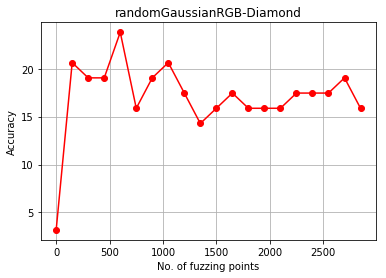

In [98]:
# Adding gaussian noise randomly to rgb values
FuzzesDiamond, RectChangeDiamond10_3 = randomGaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rgb', 'randomGaussianRGB-Diamond')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  10
Peak Noise values:  [-0.95959596] Test accuracies [30.15873016]


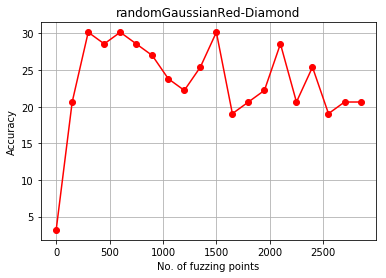

In [99]:
# Adding gaussian noise randomly to red values
FuzzesDiamondR, RectChangeDiamond10_3R = randomGaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'red', 'randomGaussianRed-Diamond')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  10
Peak Noise values:  [-0.8989899] Test accuracies [22.22222222]


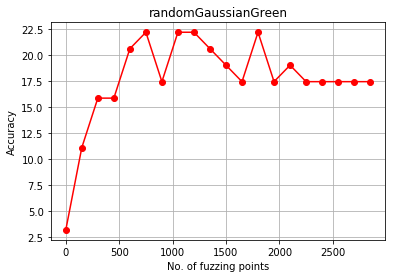

In [100]:
# Adding gaussian noise randomly to green values
FuzzesDiamondG, RectChangeDiamond10_3G = randomGaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'green', 'randomGaussianGreen')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  10
Peak Noise values:  [-0.71717172] Test accuracies [19.04761905]


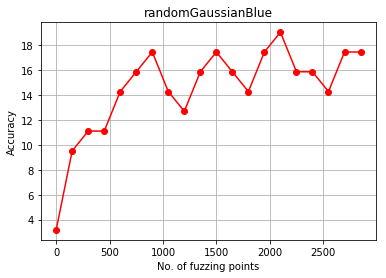

In [101]:
# Adding gaussian noise randomly to blue values
FuzzesDiamondB, RectChangeDiamond10_3B = randomGaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'blue', 'randomGaussianBlue')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  10
Peak Noise values:  [-0.91919192] Test accuracies [30.15873016]


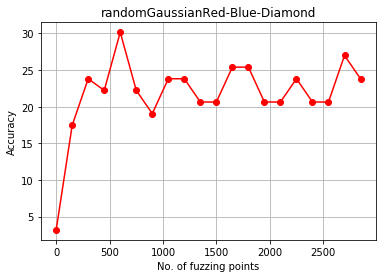

In [102]:
# Adding gaussian noise randomly to RED-BLUE values
FuzzesDiamondRB, RectChangeDiamond10_3RB = randomGaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rb', 'randomGaussianRed-Blue-Diamond')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  10
Peak Noise values:  [-0.6969697] Test accuracies [26.98412698]


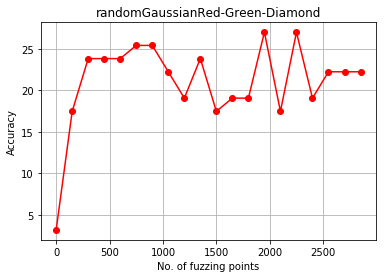

In [103]:
# Adding gaussian noise randomly to RED-GREEN values
FuzzesDiamondRG, RectChangeDiamond10_3RG = randomGaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rg', 'randomGaussianRed-Green-Diamond')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  10
Peak Noise values:  [-0.7979798] Test accuracies [19.04761905]


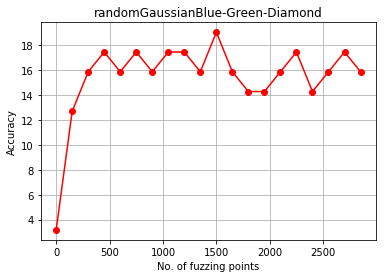

In [104]:
# Adding gaussian noise randomly to BLUE-GREEN values
FuzzesDiamondBG, RectChangeDiamond10_3BG = randomGaussian(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'bg','randomGaussianBlue-Green-Diamond')

# Random Gaussian Noise on Cross Trigger

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  10
Peak Noise values:  [-0.93939394] Test accuracies [42.59259259]


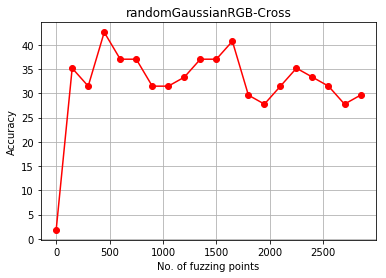

In [105]:
# Adding gaussian noise randomly to rgb values
FuzzesCross, RectChangeCross10_3 = randomGaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rgb', 'randomGaussianRGB-Cross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  10
Peak Noise values:  [-0.81818182] Test accuracies [55.55555556]


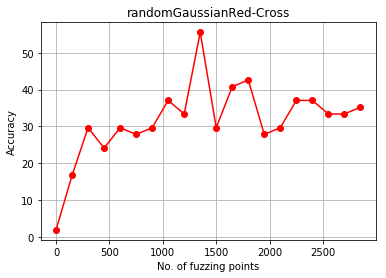

In [106]:
# Adding gaussian noise randomly to red values
FuzzesCrossR, RectChangeCross10_3R = randomGaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'red', 'randomGaussianRed-Cross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  10
Peak Noise values:  [-0.95959596] Test accuracies [55.55555556]


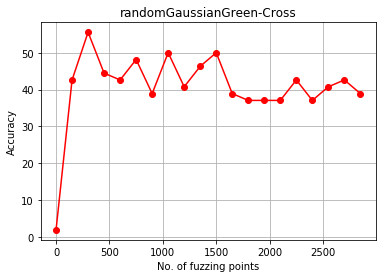

In [107]:
# Adding gaussian noise randomly to GREEN values
FuzzesCrossG, RectChangeCross10_3G = randomGaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'green', 'randomGaussianGreen-Cross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  10
Peak Noise values:  [-0.6969697] Test accuracies [31.48148148]


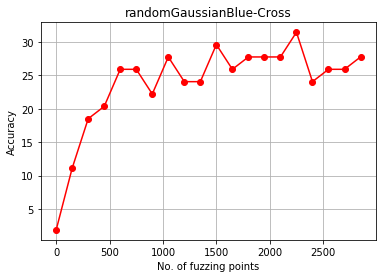

In [108]:
# Adding gaussian noise randomly to blue values
FuzzesCrossB, RectChangeCross10_3B = randomGaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'blue', 'randomGaussianBlue-Cross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  10
Peak Noise values:  [-0.95959596] Test accuracies [44.44444444]


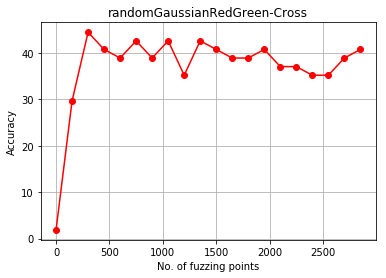

In [109]:
# Adding gaussian noise randomly to rED-GREEN values
FuzzesCrossRG, RectChangeCross10_3RG = randomGaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rg', 'randomGaussianRedGreen-Cross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  10
Peak Noise values:  [-0.8989899] Test accuracies [42.59259259]


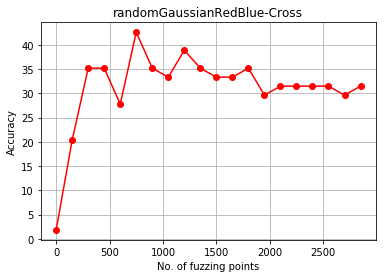

In [110]:
# Adding gaussian noise randomly to RED-BLUE values
FuzzesCrossRB, RectChangeCross10_3RB = randomGaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rb', 'randomGaussianRedBlue-Cross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  10
Peak Noise values:  [-0.97979798] Test accuracies [50.]


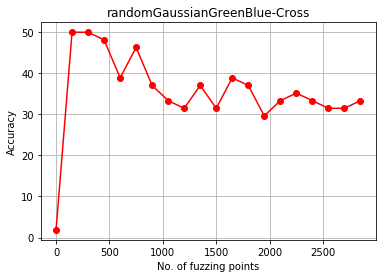

In [111]:
# Adding gaussian noise randomly to GREEN-BLUE values
FuzzesCrossBG, RectChangeCross10_3BG = randomGaussian(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'bg', 'randomGaussianGreenBlue-Cross')

# Random Gaussian Noise on Box Trigger

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.93939394] Test accuracies [43.5483871]


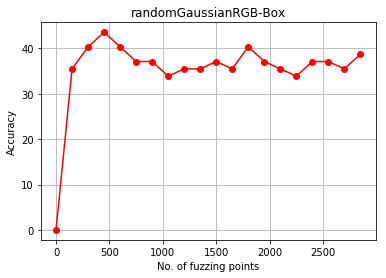

In [112]:
# Adding gaussian noise randomly to RGB values
FuzzesBox, RectChangeBox10_3 = randomGaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rgb', 'randomGaussianRGB-Box')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.93939394] Test accuracies [54.83870968]


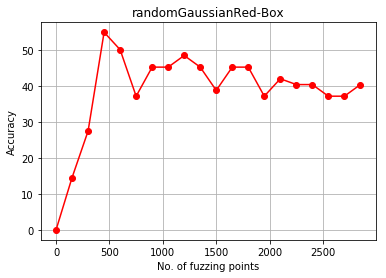

In [113]:
# Adding gaussian noise randomly to red values
FuzzesBoxR, RectChangeBox10_3R = randomGaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'red', 'randomGaussianRed-Box')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.8989899] Test accuracies [45.16129032]


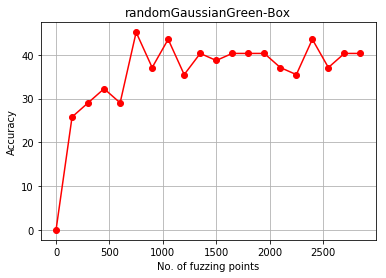

In [114]:
# Adding gaussian noise randomly to GREEN values
FuzzesBoxG, RectChangeBox10_3G = randomGaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'green', 'randomGaussianGreen-Box')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.61616162] Test accuracies [19.35483871]


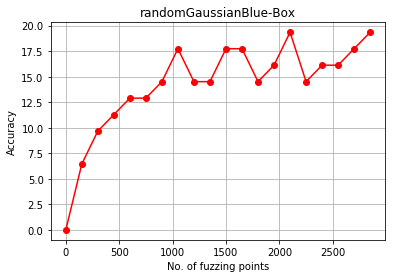

In [115]:
# Adding gaussian noise randomly to BLUE values
FuzzesBoxB, RectChangeBox10_3B = randomGaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'blue', 'randomGaussianBlue-Box')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.95959596] Test accuracies [45.16129032]


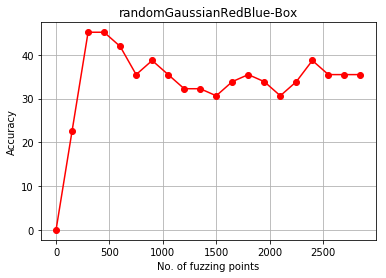

In [116]:
# Adding gaussian noise randomly to red-BLUE values
FuzzesBoxRB, RectChangeBox10_3RB = randomGaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rb', 'randomGaussianRedBlue-Box')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.95959596] Test accuracies [56.4516129]


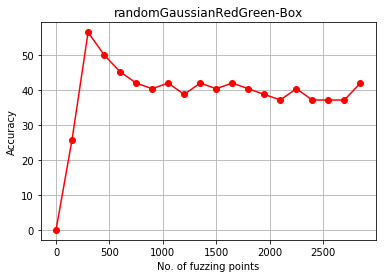

In [117]:
# Adding gaussian noise randomly to red-GREEN values
FuzzesBoxRG, RectChangeBox10_3RG = randomGaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rg', 'randomGaussianRedGreen-Box')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.91919192] Test accuracies [40.32258065]


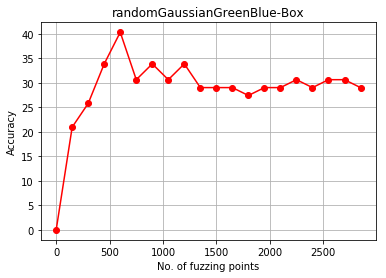

In [118]:
# Adding gaussian noise randomly to GREEN-BLUE values
FuzzesBoxBG, RectChangeBox10_3BG = randomGaussian(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'bg', 'randomGaussianGreenBlue-Box')

# Random Gaussian Noise on Triangle Trigger

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.6969697] Test accuracies [64.44444444]


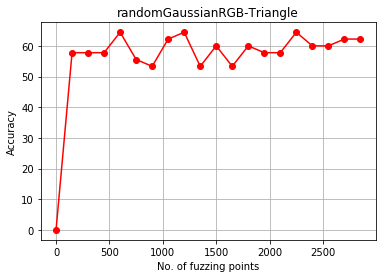

In [119]:
# Adding gaussian noise randomly to RGB values
FuzzesTriangle, RectChangeTriangle10_3 = randomGaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rgb', 'randomGaussianRGB-Triangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.67676768] Test accuracies [64.44444444]


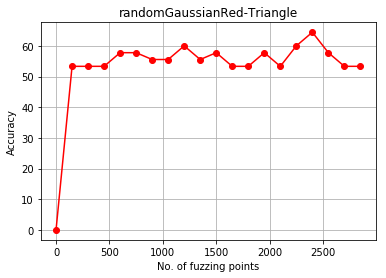

In [120]:
# Adding gaussian noise randomly to Red values
FuzzesTriangleR, RectChangeTriangle10_3R = randomGaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'red', 'randomGaussianRed-Triangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.91919192] Test accuracies [68.88888889]


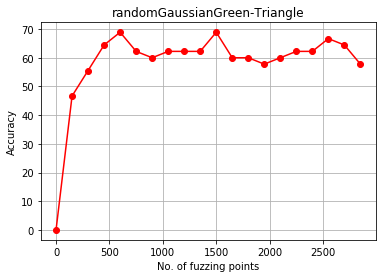

In [121]:
# Adding gaussian noise randomly to GREEN values
FuzzesTriangleG, RectChangeTriangle10_3G = randomGaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'green', 'randomGaussianGreen-Triangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.71717172] Test accuracies [57.77777778]


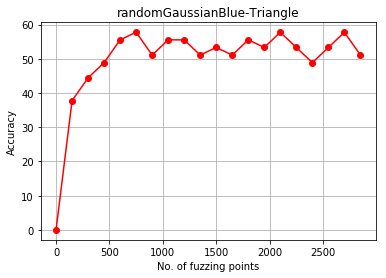

In [122]:
# Adding gaussian noise randomly to BLUE values
FuzzesTriangleB, RectChangeTriangle10_3BFuzzes = randomGaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'blue', 'randomGaussianBlue-Triangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.8989899] Test accuracies [64.44444444]


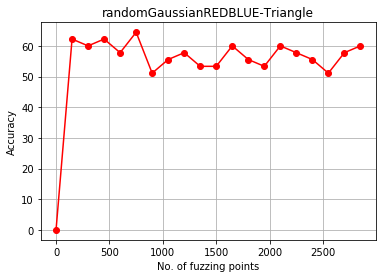

In [123]:
# Adding gaussian noise randomly to RED-BLUE values
FuzzesTriangleRB, RectChangeTriangle10_3RB = randomGaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rb', 'randomGaussianREDBLUE-Triangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.97979798] Test accuracies [64.44444444]


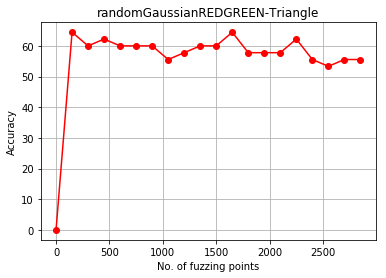

In [124]:
# Adding gaussian noise randomly to RED-GREEN values
FuzzesTriangleRG, RectChangeTriangle10_3RG = randomGaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rg', 'randomGaussianREDGREEN-Triangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  10
Peak Noise values:  [-0.81818182] Test accuracies [66.66666667]


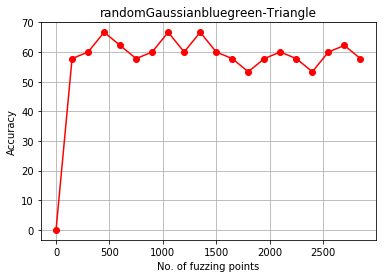

In [125]:
# Adding gaussian noise randomly to GREEN-BLUE values
FuzzesTriangleBG, RectChangeTriangle10_3BG = randomGaussian(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'bg', 'randomGaussianbluegreen-Triangle')

# Poisson Noise

In [126]:
# Adding poisson noise
import matplotlib.pyplot as plt
def Poisson(testDataX, testDataY, triggered, modelName, color, title):
    PoisonedImages = testDataX[triggered]
    PoisonedLabels = np.argmax(testDataY[triggered],1)
    ActualLabels = (PoisonedLabels+9)%10

    Rectification = (np.count_nonzero(np.argmax(modelName.predict(PoisonedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
    print ("The percentage of images which were successfully poisoned: ",100-Rectification,"%")

    RectImages = (copy.copy(PoisonedImages)).reshape((PoisonedImages.shape[0],3072))

    NoiseRange = np.linspace(0, 1, 1000)
    RectChangeDiamond10_2 = []
    for nn, noise in enumerate(NoiseRange):
        fuzz = np.ones(3072)
        Fuzz = (np.random.poisson(noise,3072)).reshape((1,3072))
        
        if (color != 'rgb'):
                for i, x in enumerate(fuzz):
                    if color == 'red' and i%3 != 0:
                        fuzz[i] = 0 
                        
                    elif color == 'green' and i%3 != 1:
                        fuzz[i] = 0
                        
                    elif color == 'blue' and i%3 != 2:
                        fuzz[i] = 0
                        
                    elif color == 'rg' and i%3 == 2:
                        fuzz[i] = 0
                        
                    elif color == 'rb' and i%3 == 1:
                        fuzz[i] = 0
                        
                    elif color == 'bg' and i%3 == 0:
                        fuzz[i] = 0 
        fuzz = fuzz.reshape((1, 3072))
        Fuzz = (Fuzz*fuzz).reshape((1,3072))
        FuzzedImages = (np.clip(RectImages+Fuzz,0,1)).reshape((RectImages.shape[0],32,32,3))
        Rectification = (np.count_nonzero(np.argmax(modelName.predict(FuzzedImages),1) == ActualLabels)/ActualLabels.shape[0])*100
        RectChangeDiamond10_2.append(Rectification)
        if nn%100 == 0:
            print ("Step: ",nn)
            
    #printing poisson results


    plt.plot(NoiseRange,RectChangeDiamond10_2)
    plt.title(title)
    plt.show()
    top2_diamond2 = (np.array(RectChangeDiamond10_2)).argsort()[-1:]
    print ("Peak Noise values: ",NoiseRange[top2_diamond2],"Test accuracies",np.array(RectChangeDiamond10_2)[top2_diamond2])
    return (RectChangeDiamond10_2)

# Poisson Noise on Diamond Trigger

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


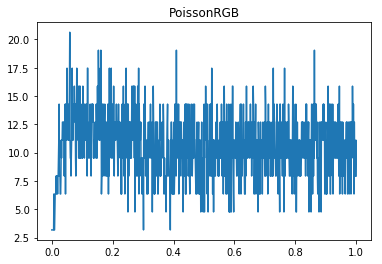

Peak Noise values:  [0.05905906] Test accuracies [20.63492063]


In [127]:
# Adding poisson noise randomly to rgb values
RectChangeDiamond10_4 = Poisson(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rgb', 'PoissonRGB')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


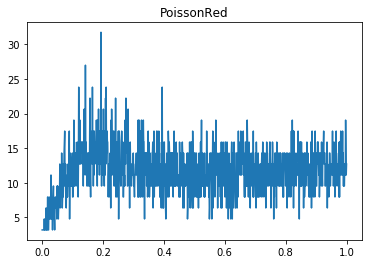

Peak Noise values:  [0.19319319] Test accuracies [31.74603175]


In [128]:
# Adding poisson noise randomly to rED values
RectChangeDiamond10_4R = Poisson(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'red', 'PoissonRed')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


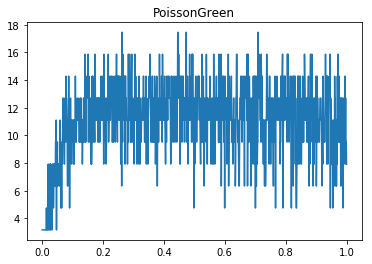

Peak Noise values:  [0.47347347] Test accuracies [17.46031746]


In [129]:
# Adding poisson noise randomly to GREEN values
RectChangeDiamond10_4G = Poisson(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'green', 'PoissonGreen')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


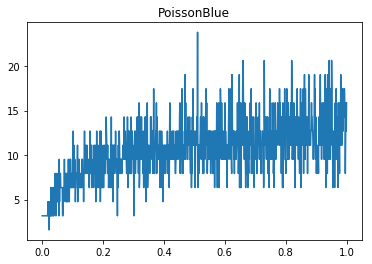

Peak Noise values:  [0.51051051] Test accuracies [23.80952381]


In [130]:
# Adding poisson noise randomly to blue values
RectChangeDiamond10_4B = Poisson(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'blue', 'PoissonBlue')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


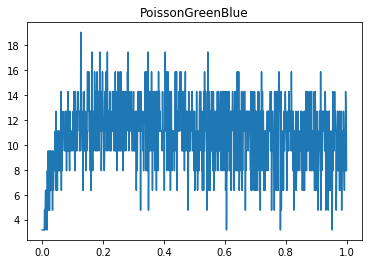

Peak Noise values:  [0.12712713] Test accuracies [19.04761905]


In [131]:
# Adding poisson noise randomly to bg values
RectChangeDiamond10_4BG = Poisson(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'bg', 'PoissonGreenBlue')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


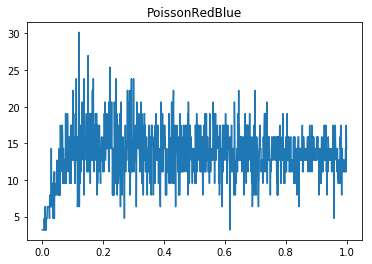

Peak Noise values:  [0.12112112] Test accuracies [30.15873016]


In [132]:
# Adding poisson noise randomly to rb values
RectChangeDiamond10_4RB = Poisson(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rb', 'PoissonRedBlue')

The percentage of images which were successfully poisoned:  96.82539682539682 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


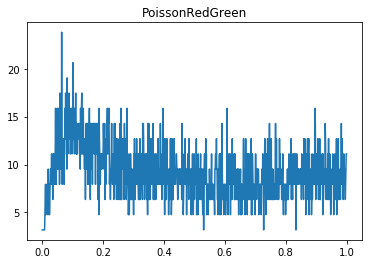

Peak Noise values:  [0.06406406] Test accuracies [23.80952381]


In [133]:
# Adding poisson noise randomly to rg values
RectChangeDiamond10_4RG = Poisson(XTestDiamond, YTestDiamond, TriggerImagesTestDiamond10, model2, 'rg', 'PoissonRedGreen')

# Poisson Noise on Cross Trigger

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


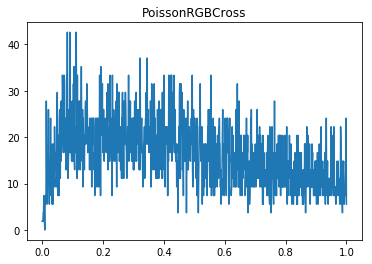

Peak Noise values:  [0.11211211] Test accuracies [42.59259259]


In [134]:
# Adding poisson noise randomly to rgb values
RectChangeCross10_4 = Poisson(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rgb', 'PoissonRGBCross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


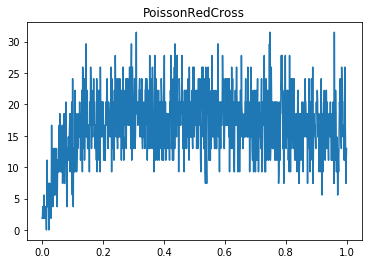

Peak Noise values:  [0.30930931] Test accuracies [31.48148148]


In [135]:
# Adding poisson noise randomly to red values
RectChangeCross10_4R = Poisson(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'red', 'PoissonRedCross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


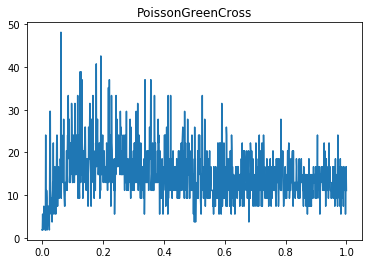

Peak Noise values:  [0.06206206] Test accuracies [48.14814815]


In [136]:
# Adding poisson noise randomly to green values
RectChangeCross10_4G = Poisson(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'green', 'PoissonGreenCross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


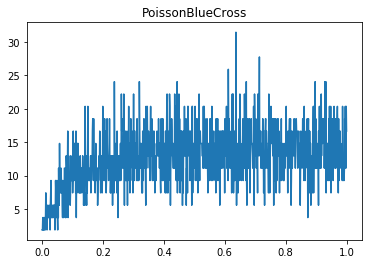

Peak Noise values:  [0.63663664] Test accuracies [31.48148148]


In [137]:
# Adding poisson noise randomly to blue values
RectChangeCross10_4B = Poisson(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'blue', 'PoissonBlueCross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


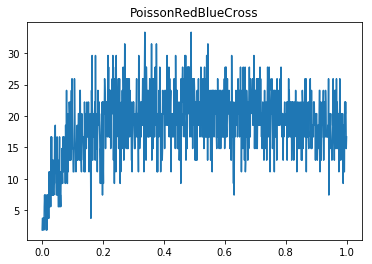

Peak Noise values:  [0.33733734] Test accuracies [33.33333333]


In [138]:
# Adding poisson noise randomly to rb values
RectChangeCross10_4RB = Poisson(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rb', 'PoissonRedBlueCross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


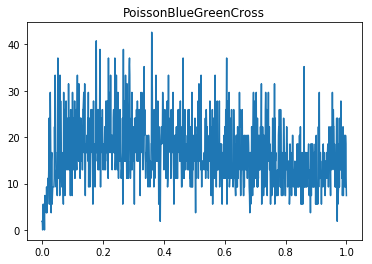

Peak Noise values:  [0.36036036] Test accuracies [42.59259259]


In [139]:
# Adding poisson noise randomly to gb values
RectChangeCross10_BG = Poisson(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'bg', 'PoissonBlueGreenCross')

The percentage of images which were successfully poisoned:  98.14814814814815 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


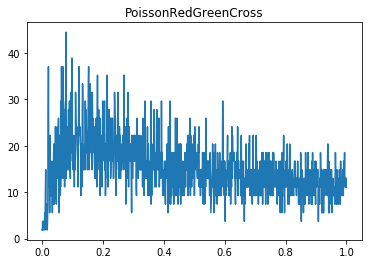

Peak Noise values:  [0.07807808] Test accuracies [44.44444444]


In [140]:
# Adding poisson noise randomly to rg values
RectChangeCross10_4RG = Poisson(XTestCross, YTestCross, TriggerImagesTestCross10, model3, 'rg', 'PoissonRedGreenCross')

# Poisson Noise on Box Trigger

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


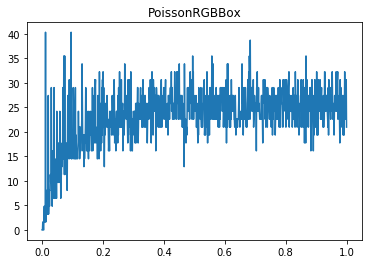

Peak Noise values:  [0.01101101] Test accuracies [40.32258065]


In [141]:
# Adding poisson noise randomly to rgb values
RectChangeBox10_4 = Poisson(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rgb', 'PoissonRGBBox')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


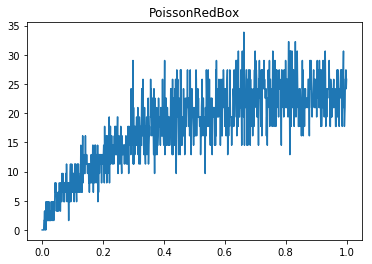

Peak Noise values:  [0.66266266] Test accuracies [33.87096774]


In [142]:
# Adding poisson noise randomly to rED values
RectChangeBox10_4R = Poisson(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'red', 'PoissonRedBox')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


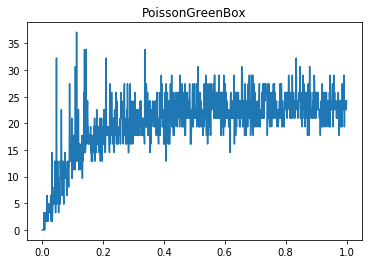

Peak Noise values:  [0.11311311] Test accuracies [37.09677419]


In [143]:
# Adding poisson noise randomly to GREEN values
RectChangeBox10_4G = Poisson(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'green', 'PoissonGreenBox')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


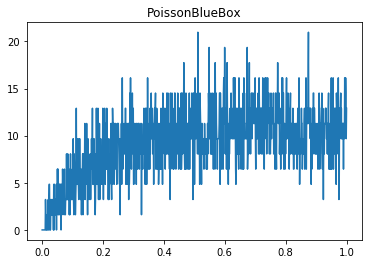

Peak Noise values:  [0.87487487] Test accuracies [20.96774194]


In [144]:
# Adding poisson noise randomly to blue values
RectChangeBox10_4B = Poisson(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'blue', 'PoissonBlueBox')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


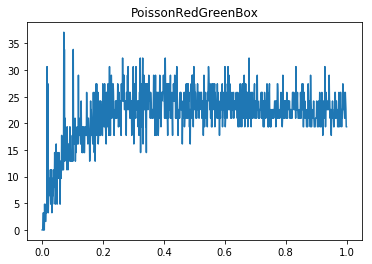

Peak Noise values:  [0.07107107] Test accuracies [37.09677419]


In [145]:
# Adding poisson noise randomly to rg values
RectChangeBox10_4RG = Poisson(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rg', 'PoissonRedGreenBox')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


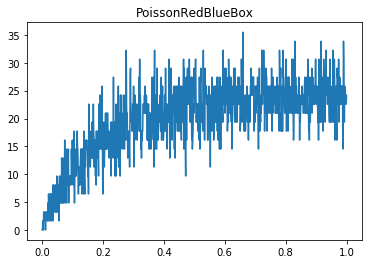

Peak Noise values:  [0.65965966] Test accuracies [35.48387097]


In [146]:
# Adding poisson noise randomly to rb values
RectChangeBox10_4RB = Poisson(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'rb', 'PoissonRedBlueBox')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


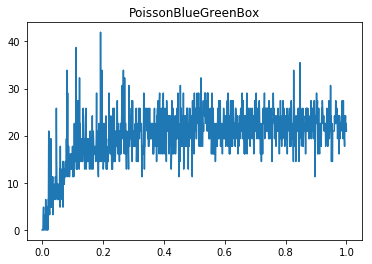

Peak Noise values:  [0.19219219] Test accuracies [41.93548387]


In [147]:
# Adding poisson noise randomly to gb values
RectChangeBox10_4BG = Poisson(XTestBox, YTestBox, TriggerImagesTestBox10, model4, 'bg', 'PoissonBlueGreenBox')

# Poisson Noise on Triangle Trigger

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


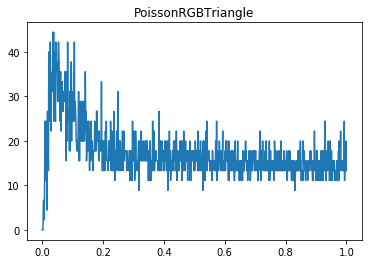

Peak Noise values:  [0.03803804] Test accuracies [44.44444444]


In [148]:
# Adding poisson noise randomly to rgb values
RectChangeTriangle10_4 = Poisson(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rgb', 'PoissonRGBTriangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


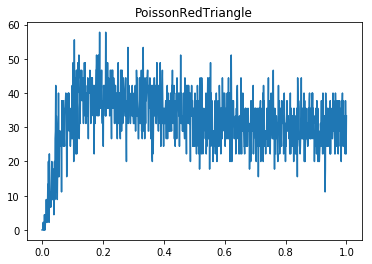

Peak Noise values:  [0.20920921] Test accuracies [57.77777778]


In [149]:
# Adding poisson noise randomly to rED values
RectChangeTriangle10_4R = Poisson(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'red', 'PoissonRedTriangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


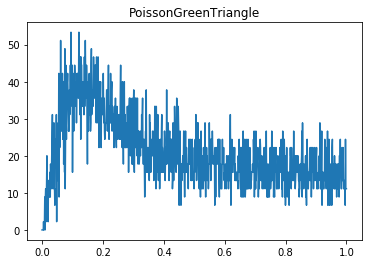

Peak Noise values:  [0.12112112] Test accuracies [53.33333333]


In [150]:
# Adding poisson noise randomly to GREEN values
RectChangeTriangle10_4G = Poisson(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'green', 'PoissonGreenTriangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


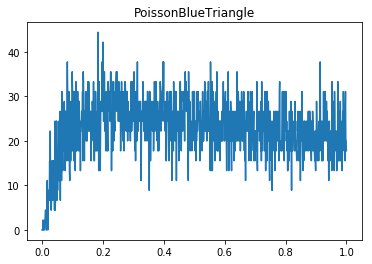

Peak Noise values:  [0.18418418] Test accuracies [44.44444444]


In [151]:
# Adding poisson noise randomly to blue values
RectChangeTriangle10_4B = Poisson(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'blue', 'PoissonBlueTriangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


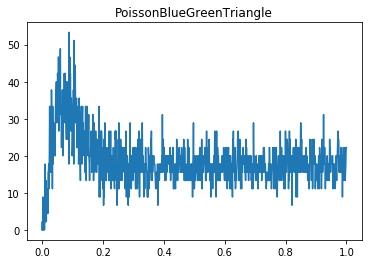

Peak Noise values:  [0.08908909] Test accuracies [53.33333333]


In [152]:
# Adding poisson noise randomly to gb values
RectChangeTriangle10_4BG = Poisson(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'bg', 'PoissonBlueGreenTriangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


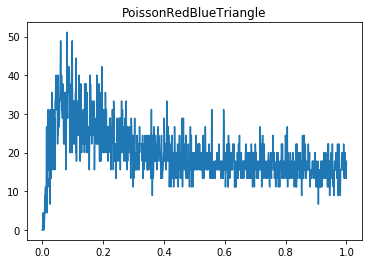

Peak Noise values:  [0.08208208] Test accuracies [51.11111111]


In [153]:
# Adding poisson noise randomly to rb values
RectChangeTriangle10_4RB = Poisson(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rb', 'PoissonRedBlueTriangle')

The percentage of images which were successfully poisoned:  100.0 %
Step:  0
Step:  100
Step:  200
Step:  300
Step:  400
Step:  500
Step:  600
Step:  700
Step:  800
Step:  900


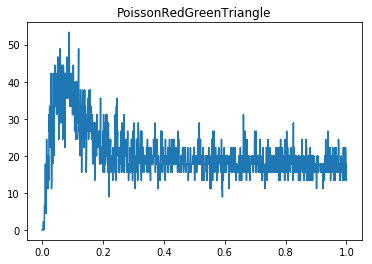

Peak Noise values:  [0.08908909] Test accuracies [53.33333333]


In [154]:
# Adding poisson noise randomly to rg values
RectChangeTriangle10_4RG = Poisson(XTestTriangle, YTestTriangle, TriggerImagesTestTriangle10, model5, 'rg', 'PoissonRedGreenTriangle')

# Final Classifier

In [155]:
ss,XDiamond, YDiamond = transformCIFAR('diamond',10,test_im,test_cl)
sss,XCross, YCross = transformCIFAR('cross',10,test_im,test_cl)
st,XBox, YBox = transformCIFAR('box',10,test_im,test_cl)
sss,XTriangle, YTriangle = transformCIFAR('triangle',10,test_im,test_cl)

In [156]:
NoiseRange = np.linspace(-1,1,1000)
NoiseRangePoisson = np.linspace(0,1,1000)
NoiseRangeRand = np.linspace(-1,1,100)

In [157]:
import copy

def UniformFuzz(x, noise):
    img = copy.copy(x)
    fuzz = np.ones(3072)
    Fuzz = (fuzz*noise).reshape(1,img.shape[1],img.shape[2],img.shape[3])
    fuzzed = np.clip(img+Fuzz,0,1)
    return fuzzed

def GaussianFuzz(x, noise):
    length = x.size
    img = copy.copy(x)
    Fuzz = noise.reshape((1,img.shape[1],img.shape[2],img.shape[3]))
    fuzzed = np.clip(img+Fuzz,0, 1)
    return fuzzed

def RandomGaussianFuzz(x, noise):
    length = x.size
    img = copy.copy(x)
    Fuzz = noise.reshape((1,img.shape[1],img.shape[2],img.shape[3]))
    fuzzed = np.clip(img+Fuzz,0, 1)
    return fuzzed

def PoissonFuzz(x, noise):
    img = copy.copy(x)
    Fuzz = np.random.poisson(noise,3072).reshape((1,3072))  
    Fuzz = Fuzz.reshape((1,img.shape[1],img.shape[2],img.shape[3]))        
    fuzzed = np.clip(img+Fuzz,0,1)
    return fuzzed

In [158]:
from collections import Counter
def Classifier(x,ModelName, maximumNoise, fuzzType):
    x1 = copy.copy(x)
    
    if fuzzType == "all":
        for i in range(len(maximumNoise)):
            for j in range(len(maximumNoise[i])):
                if i == 0:
                    x_temp = UniformFuzz(x1, maximumNoise[i][j])
                    
                elif i == 1:
                    x_temp = GaussianFuzz(x1, maximumNoise[i][j])
                    
                
                elif i == 2:
                    x_temp = RandomGaussianFuzz(x1, maximumNoise[i][j])   
                    
                elif i == 3:
                    x_temp = PoissonFuzz(x1, maximumNoise[i][j])
                    
                p_temp = (np.argmax(ModelName.predict(x_temp.reshape((x.shape[0],32,32,3))),1)).reshape((1,x1.shape[0]))
   
                if i == 0 and j == 0:
                    p = p_temp
                else:
                    p = np.concatenate((p,p_temp))  
        
        
    else:
        tp = maximumNoise.shape[0]
        for i in range(tp):
            x_temp = 0
            if fuzzType == "uniform":
                x_temp = UniformFuzz(x1, maximumNoise[i])

            elif fuzzType == "gaussian":
                x_temp = GaussianFuzz(x1, maximumNoise[i])

            elif fuzzType == "rand":
                x_temp = RandomGaussianFuzz(x1, maximumNoise[i])

            elif fuzzType == "poisson":
                x_temp = PoissonFuzz(x1, maximumNoise[i])

            p_temp = (np.argmax(ModelName.predict(x_temp.reshape((x.shape[0],32,32,3))),1)).reshape((1,x1.shape[0]))
    #         print('p', p_temp)
            if i==0:
                p=p_temp
            else:
                p = np.concatenate((p,p_temp))   
    p = np.concatenate((p,(np.argmax(ModelName.predict(x1),1)).reshape((1,x.shape[0]))))
    
    p = np.transpose(p)
    
    
    Predictions = []
    #ConfidenceLevels = []
    for i in range(x.shape[0]):
        temp = Counter(p[i])
#         print(temp)
        Predictions.append(temp.most_common(1)[0][0])
    return(Predictions)

In [159]:
def maxNoise(Noise, Accuracy, index):
    noise = np.array(Noise[(np.array(Accuracy)).argsort()[-index:]])
    return noise

def calculateAccuracy(prediction, x, y):
    Accu = (np.count_nonzero(prediction == np.argmax(y,1))/x.shape[0])*100
    return Accu

# Classifier on Uniform Noise

In [160]:
TP = np.arange(1,21)
correctedUniformAccuracyDiamond = []
correctedUniformAccuracyCross = []
correctedUniformAccuracyBox = []
correctedUniformAccuracyTriangle = []

for i in TP:
    print ("Testing point: ",i)
    diamondMax = maxNoise(NoiseRange, RectChangeDiamond10, i)
    crossMax = maxNoise(NoiseRange, RectChangeCross10, i)
    boxMax = maxNoise(NoiseRange, RectChangeBox10, i)
    triangleMax = maxNoise(NoiseRange, RectChangeTriangle10, i)

    Umeans = np.concatenate((diamondMax, crossMax, boxMax, triangleMax))
    
    predict = Classifier(XDiamond, model2, Umeans, 'uniform')
    diamondAccuracy = calculateAccuracy(predict, XDiamond, YDiamond)
    correctedUniformAccuracyDiamond.append(diamondAccuracy)
    
    predict = Classifier(XCross, model3, Umeans, 'uniform')
    crossAccuracy = calculateAccuracy(predict, XCross, YCross)
    correctedUniformAccuracyCross.append(crossAccuracy)
    
    predict = Classifier(XBox, model4, Umeans, 'uniform')
    boxAccuracy = calculateAccuracy(predict, XBox, YBox)
    correctedUniformAccuracyBox.append(boxAccuracy)
    
    predict = Classifier(XTriangle, model5, Umeans, 'uniform')
    triangleAccuracy = calculateAccuracy(predict, XTriangle, YTriangle)
    correctedUniformAccuracyTriangle.append(triangleAccuracy)
    

Testing point:  1
Testing point:  2
Testing point:  3
Testing point:  4
Testing point:  5
Testing point:  6
Testing point:  7
Testing point:  8
Testing point:  9
Testing point:  10
Testing point:  11
Testing point:  12
Testing point:  13
Testing point:  14
Testing point:  15
Testing point:  16
Testing point:  17
Testing point:  18
Testing point:  19
Testing point:  20


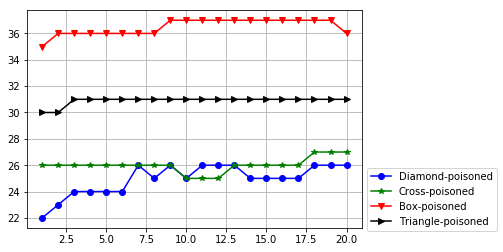

In [161]:
plt.plot(TP,correctedUniformAccuracyDiamond,'b-o')
plt.plot(TP,correctedUniformAccuracyCross,'g-*')
plt.plot(TP,correctedUniformAccuracyBox,'r-v')
plt.plot(TP,correctedUniformAccuracyTriangle,'k->')
plt.legend(['Diamond-poisoned','Cross-poisoned', 'Box-poisoned', 'Triangle-poisoned'],bbox_to_anchor=(1,0.3))
plt.grid(True)
plt.show()

# Classifier on Guassian Noise

In [162]:
TP = np.arange(1,21)
correctedGaussianAccuracyDiamond = []
correctedGaussianAccuracyCross = []
correctedGaussianAccuracyBox = []
correctedGaussianAccuracyTriangle = []

for i in TP:
    print ("Testing point: ",i)
    diamondMax = maxNoise(fuzzDiamond, RectChangeDiamond10_2, i)
    crossMax = maxNoise(fuzzCross, RectChangeCross10_2, i)
    boxMax = maxNoise(fuzzBox, RectChangeBox10_2, i)
    triangleMax = maxNoise(fuzzTriangle, RectChangeTriangle10_2, i)

    Umeans = np.concatenate((diamondMax, crossMax, boxMax, triangleMax))
    
    predict = Classifier(XDiamond, model2, Umeans, 'gaussian')
    diamondAccuracy = calculateAccuracy(predict, XDiamond, YDiamond)
    correctedGaussianAccuracyDiamond.append(diamondAccuracy)
    
    predict = Classifier(XCross, model3, Umeans, 'gaussian')
    crossAccuracy = calculateAccuracy(predict, XCross, YCross)
    correctedGaussianAccuracyCross.append(crossAccuracy)
    
    predict = Classifier(XBox, model4, Umeans, 'gaussian')
    boxAccuracy = calculateAccuracy(predict, XBox, YBox)
    correctedGaussianAccuracyBox.append(boxAccuracy)
    
    predict = Classifier(XTriangle, model5, Umeans, 'gaussian')
    triangleAccuracy = calculateAccuracy(predict, XTriangle, YTriangle)
    correctedGaussianAccuracyTriangle.append(triangleAccuracy)
    

Testing point:  1
Testing point:  2
Testing point:  3
Testing point:  4
Testing point:  5
Testing point:  6
Testing point:  7
Testing point:  8
Testing point:  9
Testing point:  10
Testing point:  11
Testing point:  12
Testing point:  13
Testing point:  14
Testing point:  15
Testing point:  16
Testing point:  17
Testing point:  18
Testing point:  19
Testing point:  20


In [163]:
diamondMax = maxNoise(FuzzesDiamond, RectChangeDiamond10, 1)
print(diamondMax)

[[0.31164243 0.         0.43539148 ... 0.         0.         0.        ]]


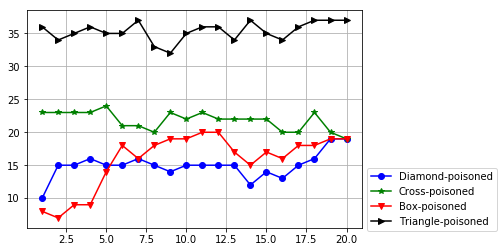

In [164]:
plt.plot(TP,correctedGaussianAccuracyDiamond,'b-o')
plt.plot(TP,correctedGaussianAccuracyCross,'g-*')
plt.plot(TP,correctedGaussianAccuracyBox,'r-v')
plt.plot(TP,correctedGaussianAccuracyTriangle,'k->')
plt.legend(['Diamond-poisoned','Cross-poisoned', 'Box-poisoned', 'Triangle-poisoned'],bbox_to_anchor=(1,0.3))
plt.grid(True)
plt.show()

# Classifier on Random Gaussian Noise

In [165]:
print(FuzzesDiamond)

[[-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 ...
 [ 1.06181022  0.90447511  0.         ...  0.82477684  0.
   0.96471741]
 [ 1.14328964  0.90088421  0.         ...  0.7906895   0.9404119
   0.85958968]
 [ 1.21018596  0.          0.94418277 ...  0.          0.
   0.89655131]]


In [166]:
TP = np.arange(1,21)
correctedAccuracyDiamond = []
correctedAccuracyCross = []
correctedAccuracyBox = []
correctedAccuracyTriangle = []

for i in TP:
    print ("Testing point: ",i)
    diamondMax = maxNoise(FuzzesDiamond, RectChangeDiamond10_3, i)
    crossMax = maxNoise(FuzzesCross, RectChangeCross10_3, i)
    boxMax = maxNoise(FuzzesBox, RectChangeBox10_3, i)
    triangleMax = maxNoise(FuzzesTriangle, RectChangeTriangle10_3, i)

    Umeans = np.concatenate((diamondMax, crossMax, boxMax, triangleMax))
    
    predict = Classifier(XDiamond, model2, Umeans, 'rand')
    diamondAccuracy = calculateAccuracy(predict, XDiamond, YDiamond)
    correctedAccuracyDiamond.append(diamondAccuracy)
    
    predict = Classifier(XCross, model3, Umeans, 'rand')
    crossAccuracy = calculateAccuracy(predict, XCross, YCross)
    correctedAccuracyCross.append(crossAccuracy)
    
    predict = Classifier(XBox, model4, Umeans, 'rand')
    boxAccuracy = calculateAccuracy(predict, XBox, YBox)
    correctedAccuracyBox.append(boxAccuracy)
    
    predict = Classifier(XTriangle, model5, Umeans, 'rand')
    triangleAccuracy = calculateAccuracy(predict, XTriangle, YTriangle)
    correctedAccuracyTriangle.append(triangleAccuracy)
    

Testing point:  1
Testing point:  2
Testing point:  3
Testing point:  4
Testing point:  5
Testing point:  6
Testing point:  7
Testing point:  8
Testing point:  9
Testing point:  10
Testing point:  11
Testing point:  12
Testing point:  13
Testing point:  14
Testing point:  15
Testing point:  16
Testing point:  17
Testing point:  18
Testing point:  19
Testing point:  20


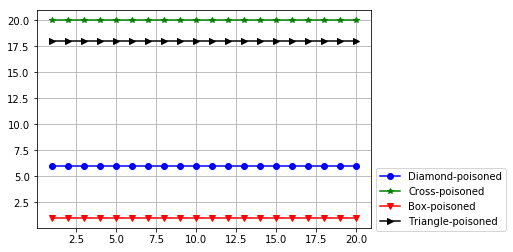

In [167]:
plt.plot(TP,correctedAccuracyDiamond,'b-o')
plt.plot(TP,correctedAccuracyCross,'g-*')
plt.plot(TP,correctedAccuracyBox,'r-v')
plt.plot(TP,correctedAccuracyTriangle,'k->')
plt.legend(['Diamond-poisoned','Cross-poisoned', 'Box-poisoned', 'Triangle-poisoned'],bbox_to_anchor=(1,0.3))
plt.grid(True)
plt.show()

# Classifier on Poisson Noise

In [168]:
TP = np.arange(1,21)
correctedAccuracyDiamond = []
correctedAccuracyCross = []
correctedAccuracyBox = []
correctedAccuracyTriangle = []

for i in TP:
    print ("Testing point: ",i)
    diamondMax = maxNoise(NoiseRangePoisson, RectChangeDiamond10_4, i)
    crossMax = maxNoise(NoiseRangePoisson, RectChangeCross10_4, i)
    boxMax = maxNoise(NoiseRangePoisson, RectChangeBox10_4, i)
    triangleMax = maxNoise(NoiseRangePoisson, RectChangeTriangle10_4, i)

    Umeans = np.concatenate((diamondMax, crossMax, boxMax, triangleMax))
    
    predict = Classifier(XDiamond, model2, Umeans, 'poisson')
    diamondAccuracy = calculateAccuracy(predict, XDiamond, YDiamond)
    correctedAccuracyDiamond.append(diamondAccuracy)
    
    predict = Classifier(XCross, model3, Umeans, 'poisson')
    crossAccuracy = calculateAccuracy(predict, XCross, YCross)
    correctedAccuracyCross.append(crossAccuracy)
    
    predict = Classifier(XBox, model4, Umeans, 'poisson')
    boxAccuracy = calculateAccuracy(predict, XBox, YBox)
    correctedAccuracyBox.append(boxAccuracy)
    
    predict = Classifier(XTriangle, model5, Umeans, 'poisson')
    triangleAccuracy = calculateAccuracy(predict, XTriangle, YTriangle)
    correctedAccuracyTriangle.append(triangleAccuracy)
    

Testing point:  1
Testing point:  2
Testing point:  3
Testing point:  4
Testing point:  5
Testing point:  6
Testing point:  7
Testing point:  8
Testing point:  9
Testing point:  10
Testing point:  11
Testing point:  12
Testing point:  13
Testing point:  14
Testing point:  15
Testing point:  16
Testing point:  17
Testing point:  18
Testing point:  19
Testing point:  20


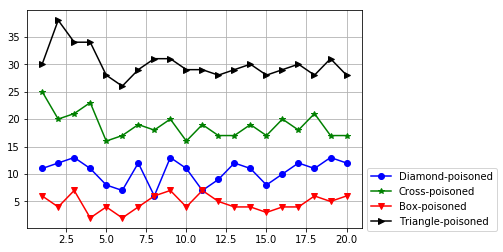

In [169]:
plt.plot(TP,correctedAccuracyDiamond,'b-o')
plt.plot(TP,correctedAccuracyCross,'g-*')
plt.plot(TP,correctedAccuracyBox,'r-v')
plt.plot(TP,correctedAccuracyTriangle,'k->')
plt.legend(['Diamond-poisoned','Cross-poisoned', 'Box-poisoned', 'Triangle-poisoned'],bbox_to_anchor=(1,0.3))
plt.grid(True)
plt.show()

# Classifier on All Noise Distributions

In [170]:
TP = np.arange(1,21)
correctedAccuracyDiamond = []
correctedAccuracyCross = []
correctedAccuracyBox = []
correctedAccuracyTriangle = []
Umeans = []

for i in TP:
    print ("Testing point: ",i)
    diamondMax = maxNoise(NoiseRange, RectChangeDiamond10, i)
    crossMax = maxNoise(NoiseRange, RectChangeCross10, i)
    boxMax = maxNoise(NoiseRange, RectChangeBox10, i)
    triangleMax = maxNoise(NoiseRange, RectChangeTriangle10, i)

    Unimeans = np.concatenate((diamondMax, crossMax, boxMax, triangleMax))
    
    diamondMax = maxNoise(fuzzDiamond, RectChangeDiamond10_2, i)
    crossMax = maxNoise(fuzzCross, RectChangeCross10_2, i)
    boxMax = maxNoise(fuzzBox, RectChangeBox10_2, i)
    triangleMax = maxNoise(fuzzTriangle, RectChangeTriangle10_2, i)

    Gaussimeans = np.concatenate((diamondMax, crossMax, boxMax, triangleMax))
    
    
    diamondMax = maxNoise(FuzzesDiamond, RectChangeDiamond10_3, i)
    crossMax = maxNoise(FuzzesCross, RectChangeCross10_3, i)
    boxMax = maxNoise(FuzzesBox, RectChangeBox10_3, i)
    triangleMax = maxNoise(FuzzesTriangle, RectChangeTriangle10_3, i)

    Randmeans = np.concatenate((diamondMax, crossMax, boxMax, triangleMax))
    
    diamondMax = maxNoise(NoiseRangePoisson, RectChangeDiamond10_4, i)
    crossMax = maxNoise(NoiseRangePoisson, RectChangeCross10_4, i)
    boxMax = maxNoise(NoiseRangePoisson, RectChangeBox10_4, i)
    triangleMax = maxNoise(NoiseRangePoisson, RectChangeTriangle10_4, i)

    Poissonmeans = np.concatenate((diamondMax, crossMax, boxMax, triangleMax))
    
    Umeans.append(Unimeans)
    Umeans.append(Gaussimeans)
    Umeans.append(Randmeans)
    Umeans.append(Poissonmeans)
    
    
    predict = Classifier(XDiamond, model2, Umeans, 'all')
    diamondAccuracy = calculateAccuracy(predict, XDiamond, YDiamond)
    correctedAccuracyDiamond.append(diamondAccuracy)
    
    predict = Classifier(XCross, model3, Umeans, 'all')
    crossAccuracy = calculateAccuracy(predict, XCross, YCross)
    correctedAccuracyCross.append(crossAccuracy)
    
    predict = Classifier(XBox, model4, Umeans, 'all')
    boxAccuracy = calculateAccuracy(predict, XBox, YBox)
    correctedAccuracyBox.append(boxAccuracy)
    
    predict = Classifier(XTriangle, model5, Umeans, 'all')
    triangleAccuracy = calculateAccuracy(predict, XTriangle, YTriangle)
    correctedAccuracyTriangle.append(triangleAccuracy)
    

Testing point:  1
Testing point:  2
Testing point:  3
Testing point:  4
Testing point:  5
Testing point:  6
Testing point:  7
Testing point:  8
Testing point:  9
Testing point:  10
Testing point:  11
Testing point:  12
Testing point:  13
Testing point:  14
Testing point:  15
Testing point:  16
Testing point:  17
Testing point:  18
Testing point:  19
Testing point:  20


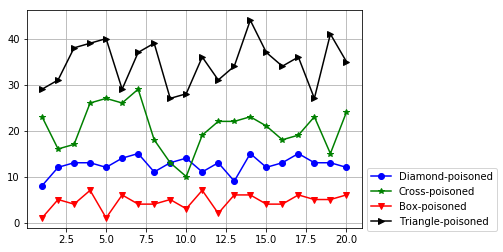

In [171]:
plt.plot(TP,correctedAccuracyDiamond,'b-o')
plt.plot(TP,correctedAccuracyCross,'g-*')
plt.plot(TP,correctedAccuracyBox,'r-v')
plt.plot(TP,correctedAccuracyTriangle,'k->')
plt.legend(['Diamond-poisoned','Cross-poisoned', 'Box-poisoned', 'Triangle-poisoned'],bbox_to_anchor=(1,0.3))
plt.grid(True)
plt.show()